<a href="https://colab.research.google.com/github/ElinorZhang0/ElinorZhang0/blob/main/Primary_analysis_ethnicity_%7C_party_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pprint import pprint
from pandas import Series, DataFrame
from pathlib import Path
import glob
from numpy.lib import type_check
import os
import pyarrow.parquet as pq
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
# If drive is not already mounted: 
if not Path('/content/drive').exists():
  drive.mount('/content/drive')

Mounted at /content/drive


# San Mateo

## San Mateo old data

In [ ]:
os.chdir("/content/drive/MyDrive")

### data clean

In [ ]:
# read table 
# SM_old=pd.read_excel('san mateo.xlsx')
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# print(SM_old.shape)
# print(SM_old.DistrictID_1.unique())
# SM_old.head()

(75715, 113)
['CD-18']


,RegistrationNumber,VoterID,VoterTitle,LastName,FirstName,MiddleName,NameSuffix,Gender,Ethnicity,ResidenceAddress,ResidenceCity,ResidenceState,ResidenceZipCode,PreDirection,StreetName,StreetSuffix,PostDirection,UnitAbbr,UnitNumber,MapNumber,MailAddress1,MailAddress2,MailAddress3,MailAddress4,MailCity,MailState,MailZip,PhoneNumber,EmailAddress,BirthDate,RegistrationDate,OriginalRegistrationDate,LastUpdateDate,StatusCode,StatusReason,StateVoterStatus,PartyName,PartyAbbr,OtherParty,VBMProgramStatus,PrecinctID,PrecinctPortion,PrecinctName,LastElectionVoted,LastPrimaryVoted,ElectionAbbr_1,ElectionAbbr_2,ElectionAbbr_3,ElectionAbbr_4,ElectionAbbr_5,ElectionDesc_1,ElectionDesc_2,ElectionDesc_3,ElectionDesc_4,ElectionDesc_5,ElectionDate_1,ElectionDate_2,ElectionDate_3,ElectionDate_4,ElectionDate_5,ElectionType_1,ElectionType_2,ElectionType_3,ElectionType_4,ElectionType_5,BallotPartyName_1,BallotPartyName_2,BallotPartyName_3,BallotPartyName_4,BallotPartyName_5,BallotPartyAbbr_1,BallotPartyAbbr_2,BallotPartyAbbr_3,BallotPartyAbbr_4,BallotPartyAbbr_5,BallotCounted_1,BallotCounted_2,BallotCounted_3,BallotCounted_4,BallotCounted_5,HistoryVotingPrecinct_1,HistoryRegularPrecinct_1,HistoryVotingPrecinct_2,HistoryRegularPrecinct_2,HistoryVotingPrecinct_3,HistoryRegularPrecinct_3,HistoryVotingPrecinct_4,HistoryRegularPrecinct_4,HistoryVotingPrecinct_5,HistoryRegularPrecinct_5,VotingMethodDesc_1,VotingMethodDesc_2,VotingMethodDesc_3,VotingMethodDesc_4,VotingMethodDesc_5,DistrictID_1,DistrictID_2,DistrictID_3,DistrictID_4,DistrictID_5,DistrictName_1,DistrictName_2,DistrictName_3,DistrictName_4,DistrictName_5,SubDistrict_1,SubDistrict_2,SubDistrict_3,SubDistrict_4,SubDistrict_5,BirthPlace,HouseNumber,Language
0,00 102903,97546816,NaN,Vincent-Adams,Linda,A,NaN,F,NaN,79 Jennings Ln,Atherton,CA,94027,NaN,Jennings,Ln,NaN,NaN,NaN,NaN,Po Bx 64,Menlo Park CA 94026,NaN,NaN,Menlo Park,CA,94026,(530)253-3438,NaN,1947-03-25,2019-04-22,2019-04-22,2019-06-07 11:29:02.490,A,VoteCal DMVCOA Move-In,A,NPP-No Party Preference,NPP,NaN,PermVBM,3010,1.0,Atherton MB 10,2020-11-03,2020 - NPP,2020Nov,NaN,NaN,NaN,NaN,Presidential General Election,NaN,NaN,NaN,NaN,2020-11-03,NaT,NaT,NaT,NaT,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3010-0,3010-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Voted by Mail Ballot,NaN,NaN,NaN,NaN,CD-18,NaN,NaN,NaN,NaN,18th Congressional District,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,IL,79,English
1,00 540203,97599434,Mrs,Thompson,Kathleen,A,NaN,NaN,NaN,1710 Roosevelt Ave,Redwood City,CA,94061,NaN,Roosevelt,Ave,NaN,NaN,NaN,NaN,1710 Roosevelt Ave,Redwood City CA 94061,NaN,NaN,Redwood City,CA,94061,NaN,NaN,1925-08-15,2019-12-01,2019-12-01,2020-07-22 09:30:47.470,A,VoteCal County Push Move-In,A,Democratic,DEM,NaN,PermVBM,4615,0.0,Redwood City 15,2020-11-03,NaN,2020Nov,NaN,NaN,NaN,NaN,Presidential General Election,NaN,NaN,NaN,NaN,2020-11-03,NaT,NaT,NaT,NaT,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4615-0,4615-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Voted by Mail Ballot,NaN,NaN,NaN,NaN,CD-18,NaN,NaN,NaN,NaN,18th Congressional District,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,CA,1710,English
2,00 S098034,80006330,NaN,Granato,Adolph,Stephen,NaN,U,NaN,808 12th Ave,Redwood City,CA,94063,NaN,12th,Ave,NaN,NaN,NaN,NaN,808 12th Ave,Redwood City CA 94063,NaN,NaN,Redwood City,CA,94063,(650)365-0275,NaN,1951-03-31,1980-05-07,1980-05-07,2002-01-21 00:00:00.000,A,Original Registration,A,Democratic,DEM,NaN,NaN,4502,1.0,Oaks 02,2020-11-03,2020 - DEM,2020Nov,NaN,2018Nov,2018June,2016Nov,Presidential General Election,NaN,Statewide General Election,Statewide Direct Primary Election,Presidential Election,2020-11-03,NaT,2018-11-06,2018-06-05,2016-11-08,General,NaN,General,Primary,General,NaN,NaN,NaN,Democratic,NaN,NaN,NaN,NaN,DEM,NaN,1.0,NaN,1.0,1.0,1.0,4501,4502-1,NaN,NaN,4502-1,4502-1,4502-0,4502,4502-0,4502,Vote Center Location,NaN,Voted by Mail Ballot,Voted by Mail Ballot,Voted at Polling Place,CD-18,NaN,NaN,NaN,

In [ ]:
# col_SM_old = ['VoterID','Gender','Ethnicity','StatusCode','PartyName','StateVoterStatus','ResidenceCity','ResidenceState','StreetName','MailCity','MailState'
#                       'PrecinctID','PrecinctPortion','PrecinctName','LastElectionVoted',
#                       'ElectionDesc_1', 'BallotPartyName_1','ElectionDate_1','BallotCounted_1','HistoryVotingPrecinct_1','HistoryRegularPrecinct_1','VotingMethodDesc_1','DistrictID_1','SubDistrict_1',
#                       'ElectionDesc_2', 'BallotPartyName_2','ElectionDate_2','BallotCounted_2','HistoryVotingPrecinct_2','HistoryRegularPrecinct_2','VotingMethodDesc_2','DistrictID_2','SubDistrict_2',
#                       'ElectionDesc_3', 'BallotPartyName_3','ElectionDate_3','BallotCounted_3','HistoryVotingPrecinct_3','HistoryRegularPrecinct_3','VotingMethodDesc_3','DistrictID_3','SubDistrict_3',
#                       'ElectionDesc_4', 'BallotPartyName_4','ElectionDate_4','BallotCounted_4','HistoryVotingPrecinct_4','HistoryRegularPrecinct_4','VotingMethodDesc_4','DistrictID_4','SubDistrict_4',
#                       'ElectionDesc_5', 'BallotPartyName_5','ElectionDate_5','BallotCounted_5','HistoryVotingPrecinct_5','HistoryRegularPrecinct_5','VotingMethodDesc_5','DistrictID_5','SubDistrict_5']
# SM_old_data = pd.DataFrame(SM_old,columns=col_SM_old)
# print(SM_old_data.shape)
# SM_old_data.head()
##SM_old_data.to_csv('SM_old_data.csv')

(75715, 59)


In [ ]:
# print(SM_old_data.Gender.unique())
# print(SM_old_data.Ethnicity.unique())
# print(SM_old_data.PartyName.unique())

In [ ]:
#SM_old.to_parquet('san mateo.parquet')

In [ ]:
# read table 
SM_old=pd.read_csv('SM_old_data.csv').drop(['Unnamed: 0'], axis=1)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(SM_old.shape)
# print(SM_old.DistrictID_1.unique())
SM_old.head()

(75715, 59)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (24,26,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VoterID,Gender,Ethnicity,StatusCode,PartyName,StateVoterStatus,ResidenceCity,ResidenceState,StreetName,MailCity,MailStatePrecinctID,PrecinctPortion,PrecinctName,LastElectionVoted,ElectionDesc_1,BallotPartyName_1,ElectionDate_1,BallotCounted_1,HistoryVotingPrecinct_1,HistoryRegularPrecinct_1,VotingMethodDesc_1,DistrictID_1,SubDistrict_1,ElectionDesc_2,BallotPartyName_2,ElectionDate_2,BallotCounted_2,HistoryVotingPrecinct_2,HistoryRegularPrecinct_2,VotingMethodDesc_2,DistrictID_2,SubDistrict_2,ElectionDesc_3,BallotPartyName_3,ElectionDate_3,BallotCounted_3,HistoryVotingPrecinct_3,HistoryRegularPrecinct_3,VotingMethodDesc_3,DistrictID_3,SubDistrict_3,ElectionDesc_4,BallotPartyName_4,ElectionDate_4,BallotCounted_4,HistoryVotingPrecinct_4,HistoryRegularPrecinct_4,VotingMethodDesc_4,DistrictID_4,SubDistrict_4,ElectionDesc_5,BallotPartyName_5,ElectionDate_5,BallotCounted_5,HistoryVotingPrecinct_5,HistoryRegularPrecinct_5,VotingMethodDesc_5,DistrictID_5,SubDistrict_5
0,97546816,F,NaN,A,NPP-No Party Preference,A,Atherton,CA,Jennings,Menlo Park,NaN,1.0,Atherton MB 10,2020-11-03,Presidential General Election,NaN,2020-11-03,1.0,3010-0,3010-1,Voted by Mail Ballot,CD-18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97599434,NaN,NaN,A,Democratic,A,Redwood City,CA,Roosevelt,Redwood City,NaN,0.0,Redwood City 15,2020-11-03,Presidential General Election,NaN,2020-11-03,1.0,4615-0,4615-0,Voted by Mail Ballot,CD-18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80006330,U,NaN,A,Democratic,A,Redwood City,CA,12th,Redwood City,NaN,1.0,Oaks 02,2020-11-03,Presidential General Election,NaN,2020-11-03,1.0,4501,4502-1,Vote Center Location,CD-18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Statewide General Election,NaN,2018-11-06,1.0,4502-1,4502-1,Voted by Mail Ballot,NaN,NaN,Statewide Direct Primary Election,Democratic,2018-06-05,1.0,4502-0,4502,Voted by Mail Ballot,NaN,NaN,Presidential Election,NaN,2016-11-08,1.0,4502-0,4502,Voted at Polling Place,NaN,NaN
3,97308675,NaN,NaN,A,Republican,A,Portola Valley,CA,Golden Hills,Portola Valley,NaN,0.0,Portola 05,2020-11-03,Presidential General Election,NaN,2020-11-03,1.0,3901,3905-0,Voted by Mail Ballot,CD-18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Statewide Direct Primary Election,Republican,2018-06-05,1.0,3905-0,3905-0,Voted by Mail Ballot,NaN,NaN,Presidential Election,NaN,2016-11-08,1.0,3905-0,3905-0,Voted at Polling Place,NaN,NaN
4,97416086,NaN,NaN,A,Democratic,A,Menlo Park,CA,Waverley,Menlo Park,NaN,NaN,Menlo Park 13,2020-11-03,Presidential General Election,NaN,2020-11-03,1.0,4413,4413,Voted by Mail Ballot,CD-18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Statewide General Election,NaN,2018-11-06,1.0,4413-0,4413-0,Voted by Mail Ballot,NaN,NaN,Statewide Direct Primary Election,Democratic,2018-06-05,0.0,4412-0,4413-0,VBM Challenged - Too Late,NaN,NaN,Presidential Election,NaN,2016-11-08,1.0,4412-0,4413-0,Voted at Polling Place,NaN,NaN


### Ethnicity Analysis

**County**

In [ ]:
# Ethnicity overall
SM_old_data_Ethnicity_count = SM_old['Ethnicity'].value_counts()
Percent_SM_old_data_Ethnicity_count = SM_old['Ethnicity'].value_counts(normalize = True).mul(100).round(2)
SM_old_data_Ethnicity_count_table = pd.DataFrame({'party count':SM_old_data_Ethnicity_count, 'Percentage':Percent_SM_old_data_Ethnicity_count})
SM_old_data_Ethnicity_count_table.reset_index(level=0, inplace=True)
print(SM_old_data_Ethnicity_count_table.shape, SM_old_data_Ethnicity_count_table)

(7, 3)    index  party count  Percentage
0  WHITE        17940       66.75
1   HISP         3872       14.41
2  ASIAN         3241       12.06
3   MULT         1124        4.18
4  OTHER          554        2.06
5  NATIV           81        0.30
6  BLACK           66        0.25


**City**

### Party Analysis

**County**

In [ ]:
# Party Distribution overall
SM_old_data_Party_count = SM_old['PartyName'].value_counts()
Percent_SM_old_data_Party_count = SM_old['PartyName'].value_counts(normalize = True).mul(100).round(2)
SM_old_data_Party_count_table = pd.DataFrame({'party count':SM_old_data_Party_count, 'Percentage':Percent_SM_old_data_Party_count})
SM_old_data_Party_count_table.reset_index(level=0, inplace=True)
print(SM_old_data_Party_count_table.shape, SM_old_data_Party_count_table)

(21, 3)                                  index  party count  Percentage
0                           Democratic        41286       54.53
1              NPP-No Party Preference        18686       24.68
2                           Republican        12234       16.16
3                 American Independent         1695        2.24
4                          Libertarian          622        0.82
5                              Unknown          414        0.55
6                                Green          315        0.42
7                                Other          230        0.30
8                    Peace and Freedom          168        0.22
9           Reform Party of California           24        0.03
10                  Common Sense Party           18        0.02
11                         Natural Law           10        0.01
12                                Misc            3        0.00
13                        Conservative            3        0.00
14                            Hu

**City**

In [ ]:
# party count (number)
SM_old_city_party_count = SM_old.groupby(SM_old.ResidenceCity)['PartyName'].value_counts()
SM_old_city_party_count = SM_old_city_party_count.unstack(level=0,fill_value=0)
SM_old_city_party_count['totals'] = SM_old_city_party_count.sum(axis=1)
SM_old_city_party_count_table1 = SM_old_city_party_count.sort_values(by='totals',ascending = False)
SM_old_city_party_count_table1.head(10)

ResidenceCity,Atherton,La Honda,Loma Mar,Menlo Park,Pescadero,Portola Valley,Redwood City,San Carlos,San Gregorio,Woodside,totals
PartyName,,,,,,,,,,,
Democratic,2239,668,69,13161,459,2956,19632,3,52,2047,41286
NPP-No Party Preference,1473,284,34,5760,171,1344,8460,1,31,1128,18686
Republican,1357,160,33,3234,107,860,5414,1,54,1014,12234
American Independent,138,35,5,449,27,87,835,0,9,110,1695
Libertarian,50,16,1,174,8,54,278,0,4,37,622
Unknown,25,8,0,129,4,26,213,0,1,8,414
Green,14,12,3,93,7,21,152,0,1,12,315
Other,17,6,1,63,3,11,117,0,0,12,230
Peace and Freedom,3,5,0,42,1,6,105,0,1,5,168


In [ ]:
# party count (%)
SM_old_city_percent_party_count = SM_old.groupby(SM_old.ResidenceCity)['PartyName'].value_counts(normalize=True).mul(100).round(2)
SM_old_city_percent_party_count=SM_old_city_percent_party_count.unstack(level=0,fill_value=0)
SM_old_city_percent_party_count_table2 = SM_old_city_percent_party_count.sort_values(by='Atherton',ascending = False)
SM_old_city_percent_party_count_table2.reset_index(level=0, inplace=True)
SM_old_city_percent_party_count_table2.head(10)

ResidenceCity,PartyName,Atherton,La Honda,Loma Mar,Menlo Park,Pescadero,Portola Valley,Redwood City,San Carlos,San Gregorio,Woodside
0,Democratic,42.08,55.76,46.94,56.93,58.32,55.04,55.72,60.0,33.99,46.72
1,NPP-No Party Preference,27.68,23.71,23.13,24.92,21.73,25.02,24.01,20.0,20.26,25.75
2,Republican,25.50,13.36,22.45,13.99,13.60,16.01,15.37,20.0,35.29,23.15
3,American Independent,2.59,2.92,3.40,1.94,3.43,1.62,2.37,0.0,5.88,2.51
4,Libertarian,0.94,1.34,0.68,0.75,1.02,1.01,0.79,0.0,2.61,0.84
5,Unknown,0.47,0.67,0.00,0.56,0.51,0.48,0.60,0.0,0.65,0.18
6,Other,0.32,0.50,0.68,0.27,0.38,0.20,0.33,0.0,0.00,0.27
7,Green,0.26,1.00,2.04,0.40,0.89,0.39,0.43,0.0,0.65,0.27
8,Common Sense Party,0.08,0.00,0.00,0.02,0.00,0.06,0.01,0.0,0.00,0.05
9,Peace and Freedom,0.06,0.42,0.00,0.18,0.13,0.11,0.30,0.0,0.65,0.11


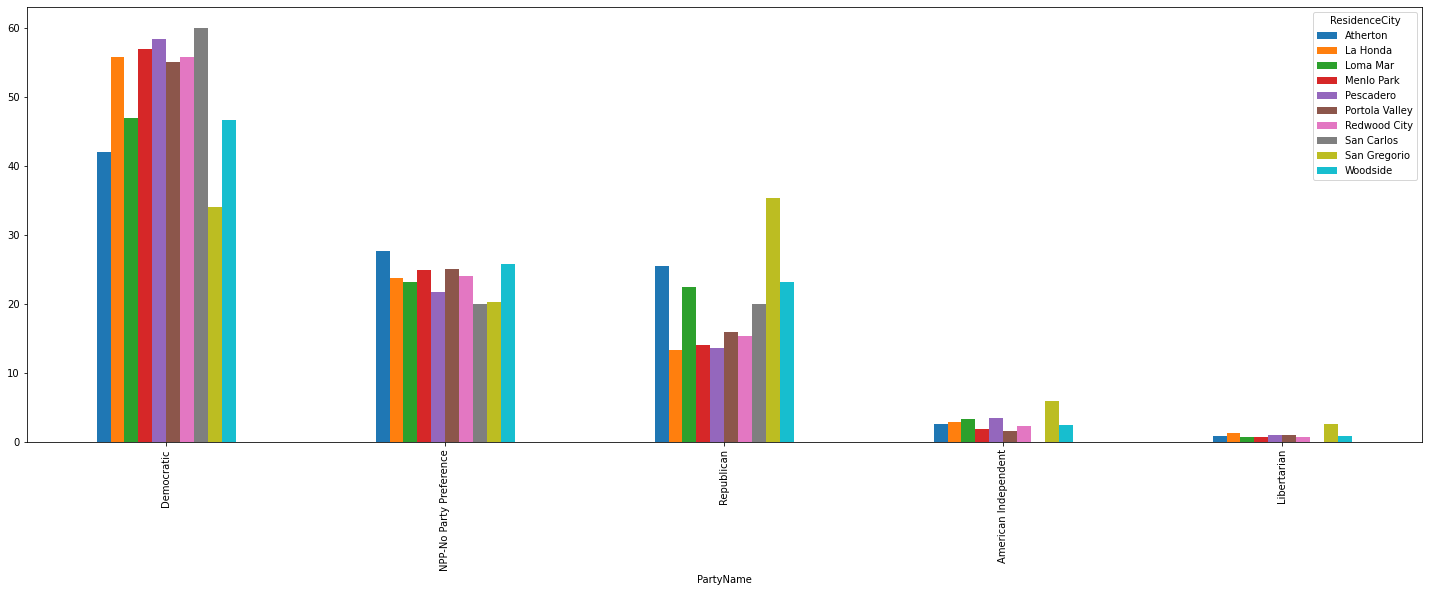

In [ ]:
SM_old_city_percent_party_count_table2[:5].plot(x=SM_old_city_percent_party_count_table2.columns[0], 
                                            y=SM_old_city_percent_party_count_table2.columns[1:11], kind="bar",figsize=(25,8))

## San Mateo new data Analysis


### data clean

In [ ]:
os.chdir("/content/drive/Shareddrives/Modeling Files/CD16 List/San Mateo Voter Data")


In [ ]:
# read table 
SM_new=pd.read_parquet('2022Jun_CD16_20220224_075502.parquet')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(SM_new.shape)
#print(SM_new.DistrictID_1.unique())
SM_new.head()


(82158, 114)


,RegistrationNumber,VoterID,VoterTitle,LastName,FirstName,MiddleName,NameSuffix,Gender,Ethnicity,ResidenceAddress,ResidenceCity,ResidenceState,ResidenceZipCode,PreDirection,StreetName,StreetSuffix,PostDirection,UnitAbbr,UnitNumber,MapNumber,MailAddress1,MailAddress2,MailAddress3,MailAddress4,MailCity,MailState,MailZip,PhoneNumber,EmailAddress,BirthDate,RegistrationDate,OriginalRegistrationDate,LastUpdateDate,StatusCode,StatusReason,StateVoterStatus,PartyName,PartyAbbr,OtherParty,VBMProgramStatus,PrecinctID,PrecinctPortion,PrecinctName,LastElectionVoted,LastPrimaryVoted,ElectionAbbr_1,ElectionAbbr_2,ElectionAbbr_3,ElectionAbbr_4,ElectionAbbr_5,ElectionDesc_1,ElectionDesc_2,ElectionDesc_3,ElectionDesc_4,ElectionDesc_5,ElectionDate_1,ElectionDate_2,ElectionDate_3,ElectionDate_4,ElectionDate_5,ElectionType_1,ElectionType_2,ElectionType_3,ElectionType_4,ElectionType_5,BallotPartyName_1,BallotPartyName_2,BallotPartyName_3,BallotPartyName_4,BallotPartyName_5,BallotPartyAbbr_1,BallotPartyAbbr_2,BallotPartyAbbr_3,BallotPartyAbbr_4,BallotPartyAbbr_5,BallotCounted_1,BallotCounted_2,BallotCounted_3,BallotCounted_4,BallotCounted_5,HistoryVotingPrecinct_1,HistoryRegularPrecinct_1,HistoryVotingPrecinct_2,HistoryRegularPrecinct_2,HistoryVotingPrecinct_3,HistoryRegularPrecinct_3,HistoryVotingPrecinct_4,HistoryRegularPrecinct_4,HistoryVotingPrecinct_5,HistoryRegularPrecinct_5,VotingMethodDesc_1,VotingMethodDesc_2,VotingMethodDesc_3,VotingMethodDesc_4,VotingMethodDesc_5,DistrictID_1,DistrictID_2,DistrictID_3,DistrictID_4,DistrictID_5,DistrictName_1,DistrictName_2,DistrictName_3,DistrictName_4,DistrictName_5,SubDistrict_1,SubDistrict_2,SubDistrict_3,SubDistrict_4,SubDistrict_5,BirthPlace,HouseNumber,Language,UOCAVABalRcptPref
0,00 576015,97670797,Mrs,Wetzel,Naomi,L,None,None,None,1941 Oakdell Dr,Menlo Park,CA,94025,None,Oakdell,Dr,None,None,None,None,1941 Oakdell Dr,Menlo Park CA 94025,None,None,Menlo Park,CA,94025,(916)775-1424,None,08/02/1930,09/01/2021,09/01/2021,2021-10-21 12:23:18.573000000,A,Third Party Change of Address (CA In-State),A,Democratic,DEM,None,PermVBM,34007,NaN,Menlo Park 007,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,NaN,None,None,None,None,None,None,None,None,CD-16,NaN,NaN,NaN,NaN,16th Congressional District - 2020,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,CA,1941,English,(none)
1,00 970732,97647830,Mrs,Louie,Eugenia,A,None,None,None,1025 Wallea Dr,Menlo Park,CA,94025,None,Wallea,Dr,None,None,None,None,1025 Wallea Dr,Menlo Park CA 94025,None,None,Menlo Park,CA,94025,(408)257-0675,None,01/01/1931,02/01/2021,02/01/2021,2021-03-19 16:21:37.720000000,A,Third Party Change of Address (CA In-State),A,Democratic,DEM,None,PermVBM,34004,NaN,Menlo Park 004,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,NaN,None,None,None,None,None,None,None,None,CD-16,NaN,NaN,NaN,NaN,16th Congressional District - 2020,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,MX,1025,English,(none)
2,00 R005472,76005526,None,Johnston,William,Robert,None,U,None,1161 Tamarind St,Montara,CA,94037,None,Tamarind,St,None,None,None,None,PO Box 370026,"Montara, CA 94037",None,None,Montara,CA,94037,(650)322-9479,None,11/09/1949,09/07/1976,09/07/1976,2000-03-13 00:00:00,A,Original Registration,A,Democratic,DEM,None,PermVBM,37206,0.0,Farallone 206,2021-09-14 00:00:00,2021,None,2021Sept14,2020Nov,None,2019Nov,None,California Gubernatorial Recall Election,Presidential General Election,None,Consolidated UDEL Election,None,09/14/2021,11/03/2020,None,11/05/2019,None,Special Vacated Primary,General,None,Uniform District Election,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,None,37205.0,37206-0,3210-0,3306-0,NaN,None,3306,3306-0,None,Voted by Mail Ballot,Voted by Mail Ballot,None,Vote

In [ ]:
columns_San_Mateo =['VoterID','Gender','Ethnicity','StatusCode','PartyName','ResidenceCity','ResidenceState','StreetName','MailCity','MailState',
                      'PrecinctID','PrecinctPortion','PrecinctName','LastElectionVoted',
                      'ElectionDesc_1', 'BallotPartyName_1','ElectionDate_1','HistoryVotingPrecinct_1','HistoryRegularPrecinct_1','VotingMethodDesc_1','DistrictID_1','SubDistrict_1',
                      'ElectionDesc_2', 'BallotPartyName_2','ElectionDate_2', 'HistoryVotingPrecinct_2','HistoryRegularPrecinct_2','VotingMethodDesc_2','DistrictID_2','SubDistrict_2',
                      'ElectionDesc_3', 'BallotPartyName_3','ElectionDate_3', 'HistoryVotingPrecinct_3','HistoryRegularPrecinct_3','VotingMethodDesc_3','DistrictID_3','SubDistrict_3',
                      'ElectionDesc_4', 'BallotPartyName_4','ElectionDate_4', 'HistoryVotingPrecinct_4','HistoryRegularPrecinct_4','VotingMethodDesc_4','DistrictID_4','SubDistrict_4',
                      'ElectionDesc_5', 'BallotPartyName_5','ElectionDate_5', 'HistoryVotingPrecinct_5','HistoryRegularPrecinct_5','VotingMethodDesc_5','DistrictID_5','SubDistrict_5']
SM_new_data = pd.DataFrame(SM_new,columns=columns_San_Mateo)
print(SM_new_data.shape)
SM_new_data.head()

(82158, 54)


,VoterID,Gender,Ethnicity,StatusCode,PartyName,ResidenceCity,ResidenceState,StreetName,MailCity,MailState,PrecinctID,PrecinctPortion,PrecinctName,LastElectionVoted,ElectionDesc_1,BallotPartyName_1,ElectionDate_1,HistoryVotingPrecinct_1,HistoryRegularPrecinct_1,VotingMethodDesc_1,DistrictID_1,SubDistrict_1,ElectionDesc_2,BallotPartyName_2,ElectionDate_2,HistoryVotingPrecinct_2,HistoryRegularPrecinct_2,VotingMethodDesc_2,DistrictID_2,SubDistrict_2,ElectionDesc_3,BallotPartyName_3,ElectionDate_3,HistoryVotingPrecinct_3,HistoryRegularPrecinct_3,VotingMethodDesc_3,DistrictID_3,SubDistrict_3,ElectionDesc_4,BallotPartyName_4,ElectionDate_4,HistoryVotingPrecinct_4,HistoryRegularPrecinct_4,VotingMethodDesc_4,DistrictID_4,SubDistrict_4,ElectionDesc_5,BallotPartyName_5,ElectionDate_5,HistoryVotingPrecinct_5,HistoryRegularPrecinct_5,VotingMethodDesc_5,DistrictID_5,SubDistrict_5
0,97670797,None,None,A,Democratic,Menlo Park,CA,Oakdell,Menlo Park,CA,34007,NaN,Menlo Park 007,None,None,NaN,None,NaN,None,None,CD-16,0,None,NaN,None,NaN,None,None,NaN,NaN,None,NaN,None,None,None,None,NaN,NaN,None,NaN,None,NaN,None,None,NaN,NaN,None,NaN,None,None,None,None,NaN,NaN
1,97647830,None,None,A,Democratic,Menlo Park,CA,Wallea,Menlo Park,CA,34004,NaN,Menlo Park 004,None,None,NaN,None,NaN,None,None,CD-16,0,None,NaN,None,NaN,None,None,NaN,NaN,None,NaN,None,None,None,None,NaN,NaN,None,NaN,None,NaN,None,None,NaN,NaN,None,NaN,None,None,None,None,NaN,NaN
2,76005526,U,None,A,Democratic,Montara,CA,Tamarind,Montara,CA,37206,0.0,Farallone 206,2021-09-14 00:00:00,None,NaN,None,NaN,None,None,CD-16,0,California Gubernatorial Recall Election,NaN,09/14/2021,37205.0,37206-0,Voted by Mail Ballot,NaN,NaN,Presidential General Election,NaN,11/03/2020,3210-0,3306-0,Voted by Mail Ballot,NaN,NaN,None,NaN,None,NaN,None,None,NaN,NaN,Consolidated UDEL Election,NaN,11/05/2019,3306,3306-0,Voted by Mail Ballot,NaN,NaN
3,97490517,None,WHITE,A,NPP-No Party Preference,Half Moon Bay,CA,Correas,Half Moon Bay,CA,33005,NaN,Half Moon Bay 005,2021-09-14 00:00:00,None,NaN,None,NaN,None,None,CD-16,0,California Gubernatorial Recall Election,NaN,09/14/2021,33004.0,33005,Voted by Mail Ballot,NaN,NaN,Presidential General Election,NaN,11/03/2020,3391,3391,Voted by Mail Ballot,NaN,NaN,None,NaN,None,NaN,None,None,NaN,NaN,Consolidated UDEL Election,NaN,11/05/2019,3324,3324-0,Voted by Mail Ballot,NaN,NaN
4,97308675,None,None,A,Republican,Portola Valley,CA,Golden Hills,Portola Valley,CA,39005,0.0,Portola 005,2021-09-14 00:00:00,None,NaN,None,NaN,None,None,CD-16,0,California Gubernatorial Recall Election,NaN,09/14/2021,39005.0,39005-0,Voted by Mail Ballot,NaN,NaN,Presidential General Election,NaN,11/03/2020,3901,3905-0,Voted by Mail Ballot,NaN,NaN,None,NaN,None,NaN,None,None,NaN,NaN,None,NaN,None,None,None,None,NaN,NaN


### Ethnicity Analysis

**County**

In [ ]:
# Ethnicity overall
SM_new_data_Ethnicity_count = SM_new_data['Ethnicity'].value_counts()
Percent_SM_new_data_Ethnicity_count = SM_new_data['Ethnicity'].value_counts(normalize = True).mul(100).round(2)
SM_new_data_Ethnicity_count_table = pd.DataFrame({'party count':SM_new_data_Ethnicity_count, 'Percentage':Percent_SM_new_data_Ethnicity_count})
SM_new_data_Ethnicity_count_table.reset_index(level=0, inplace=True)
print(SM_new_data_Ethnicity_count_table.shape, SM_new_data_Ethnicity_count_table)
# SM_new_data_Party_count_bar_chart = SM_new_data_Party_count.plot(kind='bar')
# SM_new_data_Party_count_bar_chart.set_title("Party Distribution")

(7, 3)    index  party count  Percentage
0  WHITE        19346       68.94
1  ASIAN         3914       13.95
2   HISP         2747        9.79
3   MULT         1362        4.85
4  OTHER          527        1.88
5  NATIV          120        0.43
6  BLACK           46        0.16


### Party Analysis

**County**

In [ ]:
# Party Distribution
SM_new_data_Party_count = SM_new_data['PartyName'].value_counts()
Percent_SM_new_data_Party_count = SM_new_data['PartyName'].value_counts(normalize = True).mul(100).round(2)
SM_new_data_Party_count_table = pd.DataFrame({'party count':SM_new_data_Party_count, 'Percentage':Percent_SM_new_data_Party_count})
SM_new_data_Party_count_table.reset_index(level=0, inplace=True)
print(SM_new_data_Party_count_table.shape, SM_new_data_Party_count_table)
# SM_new_data_Party_count_bar_chart = SM_new_data_Party_count.plot(kind='bar')
# SM_new_data_Party_count_bar_chart.set_title("Party Distribution")

(25, 3)                            index  party count  Percentage
0                     Democratic        45947       55.93
1        NPP-No Party Preference        19099       23.25
2                     Republican        12631       15.37
3           American Independent         2259        2.75
4                    Libertarian          748        0.91
5                          Green          414        0.50
6                        Unknown          388        0.47
7                          Other          386        0.47
8              Peace and Freedom          185        0.23
9             Common Sense Party           45        0.05
10    Reform Party of California           23        0.03
11                   Natural Law            8        0.01
12                          Misc            5        0.01
13                  Conservative            4        0.00
14                     Socialist            3        0.00
15     California National Party            2        0.00
16    

**City**

In [ ]:
# party count (number)
SM_new_city_party_count = SM_new_data.groupby(SM_new_data.ResidenceCity)['PartyName'].value_counts()
SM_new_city_party_count = SM_new_city_party_count.unstack(level=0,fill_value=0)
SM_new_city_party_count['totals'] = SM_new_city_party_count.sum(axis=1)
SM_new_city_party_count_table1 = SM_new_city_party_count.sort_values(by='totals',ascending = False)
SM_new_city_party_count_table1.head(10)

ResidenceCity,Atherton,Burlingame,El Granada,Half Moon Bay,La Honda,Loma Mar,Menlo Park,Montara,Moss Beach,Pacifica,Pescadero,Portola Valley,Princeton,Redwood City,San Gregorio,Woodside,totals
PartyName,,,,,,,,,,,,,,,,,
Democratic,2136,3,2364,4633,636,62,10345,1298,1158,15684,441,3048,37,1371,74,2657,45947
NPP-No Party Preference,1346,0,929,2020,246,35,4349,439,459,5804,179,1291,16,613,34,1339,19099
Republican,1230,0,620,1516,150,36,2461,275,237,3570,98,797,8,449,60,1124,12631
American Independent,134,0,116,290,41,4,388,63,47,804,22,106,0,81,11,152,2259
Libertarian,48,0,39,84,17,1,113,26,26,253,9,59,2,20,4,47,748
Green,11,0,38,55,13,3,68,16,18,138,6,21,0,4,3,20,414
Unknown,19,0,14,45,8,0,94,10,9,131,5,25,1,13,1,13,388
Other,23,0,24,40,8,1,62,6,19,157,2,17,1,10,0,16,386
Peace and Freedom,4,0,4,25,5,0,22,4,5,95,1,6,1,3,2,8,185


In [ ]:
# party count (%)
SM_new_city_percent_party_count = SM_new_data.groupby(SM_new_data.ResidenceCity)['PartyName'].value_counts(normalize=True).mul(100).round(2)
SM_new_city_percent_party_count=SM_new_city_percent_party_count.unstack(level=0,fill_value=0)

SM_new_city_percent_party_count_table2 = SM_new_city_percent_party_count.sort_values(by='Atherton',ascending = False)
SM_new_city_percent_party_count_table2.reset_index(level=0, inplace=True)
SM_new_city_percent_party_count_table2.head(10)

ResidenceCity,PartyName,Atherton,Burlingame,El Granada,Half Moon Bay,La Honda,Loma Mar,Menlo Park,Montara,Moss Beach,Pacifica,Pescadero,Portola Valley,Princeton,Redwood City,San Gregorio,Woodside
0,Democratic,43.10,100.0,56.92,53.14,56.48,43.36,57.74,60.51,58.46,58.81,57.80,56.70,56.06,53.39,39.15,49.35
1,NPP-No Party Preference,27.16,0.0,22.37,23.17,21.85,24.48,24.27,20.47,23.17,21.76,23.46,24.01,24.24,23.87,17.99,24.87
2,Republican,24.82,0.0,14.93,17.39,13.32,25.17,13.74,12.82,11.96,13.39,12.84,14.83,12.12,17.48,31.75,20.88
3,American Independent,2.70,0.0,2.79,3.33,3.64,2.80,2.17,2.94,2.37,3.01,2.88,1.97,0.00,3.15,5.82,2.82
4,Libertarian,0.97,0.0,0.94,0.96,1.51,0.70,0.63,1.21,1.31,0.95,1.18,1.10,3.03,0.78,2.12,0.87
5,Other,0.46,0.0,0.58,0.46,0.71,0.70,0.35,0.28,0.96,0.59,0.26,0.32,1.52,0.39,0.00,0.30
6,Unknown,0.38,0.0,0.34,0.52,0.71,0.00,0.52,0.47,0.45,0.49,0.66,0.47,1.52,0.51,0.53,0.24
7,Green,0.22,0.0,0.92,0.63,1.15,2.10,0.38,0.75,0.91,0.52,0.79,0.39,0.00,0.16,1.59,0.37
8,Common Sense Party,0.10,0.0,0.05,0.05,0.09,0.00,0.04,0.00,0.05,0.08,0.00,0.06,0.00,0.00,0.00,0.02
9,Peace and Freedom,0.08,0.0,0.10,0.29,0.44,0.00,0.12,0.19,0.25,0.36,0.13,0.11,1.52,0.12,1.06,0.15


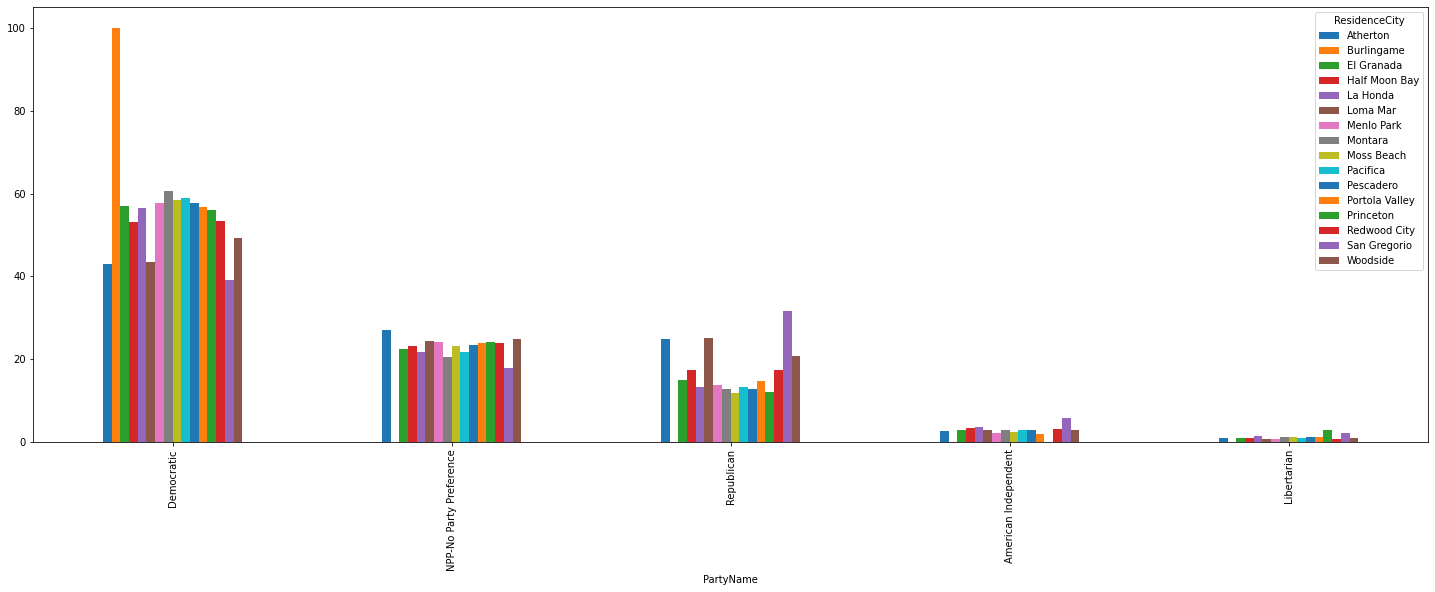

In [ ]:
SM_new_city_percent_party_count_table2[:5].plot(x=SM_new_city_percent_party_count_table2.columns[0], 
                                            y=SM_new_city_percent_party_count_table2.columns[1:17], kind="bar",figsize=(25,8))

## Comparsion (new vs. old)

old data: 75715

---


new data: 82158

###Comparsion plot on Party (new vs. old)

**County**

In [ ]:
#join two table 
df_merge_Data_SM = pd.merge(SM_old_data_Party_count_table, SM_new_data_Party_count_table, how='outer',on = 'index')
df_merge_Data_SM_fixed = df_merge_Data_SM.rename(columns={'index':'Party name','party count_x': 'SM_old_data_party_count','Percentage_x':'%_SM_old_data_party','party count_y': 'SM_new_data_party_count','Percentage_y':'%_SM_new_data_party'} )
df_merge_Data_SM_fixed.fillna(0,inplace=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_merge_Data_SM_fixed.head(12)

,Party name,SM_old_data_party_count,%_SM_old_data_party,SM_new_data_party_count,%_SM_new_data_party
0,Democratic,41286.0,54.53,45947.0,55.93
1,NPP-No Party Preference,18686.0,24.68,19099.0,23.25
2,Republican,12234.0,16.16,12631.0,15.37
3,American Independent,1695.0,2.24,2259.0,2.75
4,Libertarian,622.0,0.82,748.0,0.91
5,Unknown,414.0,0.55,388.0,0.47
6,Green,315.0,0.42,414.0,0.50
7,Other,230.0,0.30,386.0,0.47
8,Peace and Freedom,168.0,0.22,185.0,0.23
9,Reform Party of California,24.0,0.03,23.0,0.03


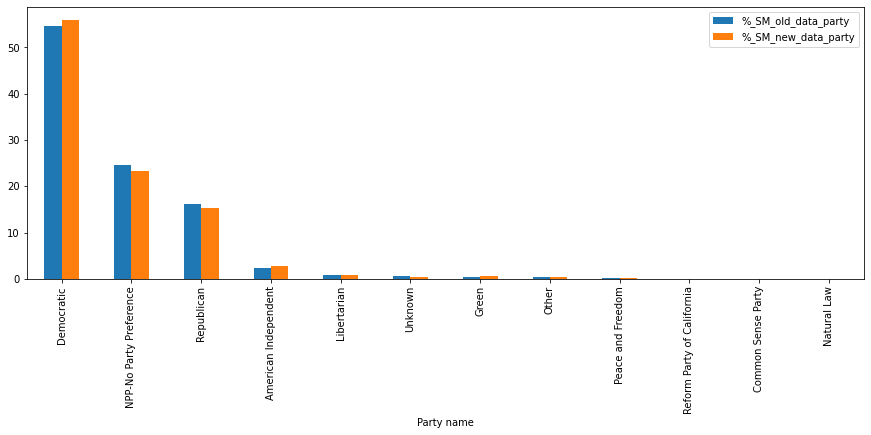

In [ ]:
df_merge_Data_SM_fixed.iloc[:12].plot(x="Party name", y=["%_SM_old_data_party", "%_SM_new_data_party"], kind="bar",figsize=(15,5))

**City**

In [ ]:
#join two table 
SM_city_party_merge_Data = pd.merge(SM_old_city_percent_party_count_table2, SM_new_city_percent_party_count_table2, how='outer',on = 'PartyName')
# df_merge_Data_SM_fixed = df_merge_Data_SM.rename(columns={'index':'Party name','party count_x': 'SM_old_data_party_count','Percentage_x':'%_SM_old_data_party','party count_y': 'SM_new_data_party_count','Percentage_y':'%_SM_new_data_party'} )
# df_merge_Data_SM_fixed.fillna(0,inplace=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(SM_city_party_merge_Data.shape)
SM_city_party_merge_Data.head(10)


(29, 27)
Index(['PartyName', 'Atherton_x', 'La Honda_x', 'Loma Mar_x', 'Menlo Park_x',
       'Pescadero_x', 'Portola Valley_x', 'Redwood City_x', 'San Carlos',
       'San Gregorio_x', 'Woodside_x', 'Atherton_y', 'Burlingame',
       'El Granada', 'Half Moon Bay', 'La Honda_y', 'Loma Mar_y',
       'Menlo Park_y', 'Montara', 'Moss Beach', 'Pacifica', 'Pescadero_y',
       'Portola Valley_y', 'Princeton', 'Redwood City_y', 'San Gregorio_y',
       'Woodside_y'],
      dtype='object', name='ResidenceCity')


ResidenceCity,PartyName,Atherton_x,La Honda_x,Loma Mar_x,Menlo Park_x,Pescadero_x,Portola Valley_x,Redwood City_x,San Carlos,San Gregorio_x,Woodside_x,Atherton_y,Burlingame,El Granada,Half Moon Bay,La Honda_y,Loma Mar_y,Menlo Park_y,Montara,Moss Beach,Pacifica,Pescadero_y,Portola Valley_y,Princeton,Redwood City_y,San Gregorio_y,Woodside_y
0,Democratic,42.08,55.76,46.94,56.93,58.32,55.04,55.72,60.0,33.99,46.72,43.10,100.0,56.92,53.14,56.48,43.36,57.74,60.51,58.46,58.81,57.80,56.70,56.06,53.39,39.15,49.35
1,NPP-No Party Preference,27.68,23.71,23.13,24.92,21.73,25.02,24.01,20.0,20.26,25.75,27.16,0.0,22.37,23.17,21.85,24.48,24.27,20.47,23.17,21.76,23.46,24.01,24.24,23.87,17.99,24.87
2,Republican,25.50,13.36,22.45,13.99,13.60,16.01,15.37,20.0,35.29,23.15,24.82,0.0,14.93,17.39,13.32,25.17,13.74,12.82,11.96,13.39,12.84,14.83,12.12,17.48,31.75,20.88
3,American Independent,2.59,2.92,3.40,1.94,3.43,1.62,2.37,0.0,5.88,2.51,2.70,0.0,2.79,3.33,3.64,2.80,2.17,2.94,2.37,3.01,2.88,1.97,0.00,3.15,5.82,2.82
4,Libertarian,0.94,1.34,0.68,0.75,1.02,1.01,0.79,0.0,2.61,0.84,0.97,0.0,0.94,0.96,1.51,0.70,0.63,1.21,1.31,0.95,1.18,1.10,3.03,0.78,2.12,0.87
5,Unknown,0.47,0.67,0.00,0.56,0.51,0.48,0.60,0.0,0.65,0.18,0.38,0.0,0.34,0.52,0.71,0.00,0.52,0.47,0.45,0.49,0.66,0.47,1.52,0.51,0.53,0.24
6,Other,0.32,0.50,0.68,0.27,0.38,0.20,0.33,0.0,0.00,0.27,0.46,0.0,0.58,0.46,0.71,0.70,0.35,0.28,0.96,0.59,0.26,0.32,1.52,0.39,0.00,0.30
7,Green,0.26,1.00,2.04,0.40,0.89,0.39,0.43,0.0,0.65,0.27,0.22,0.0,0.92,0.63,1.15,2.10,0.38,0.75,0.91,0.52,0.79,0.39,0.00,0.16,1.59,0.37
8,Common Sense Party,0.08,0.00,0.00,0.02,0.00,0.06,0.01,0.0,0.00,0.05,0.10,0.0,0.05,0.05,0.09,0.00,0.04,0.00,0.05,0.08,0.00,0.06,0.00,0.00,0.00,0.02
9,Peace and Freedom,0.06,0.42,0.00,0.18,0.13,0.11,0.30,0.0,0.65,0.11,0.08,0.0,0.10,0.29,0.44,0.00,0.12,0.19,0.25,0.36,0.13,0.11,1.52,0.12,1.06,0.15


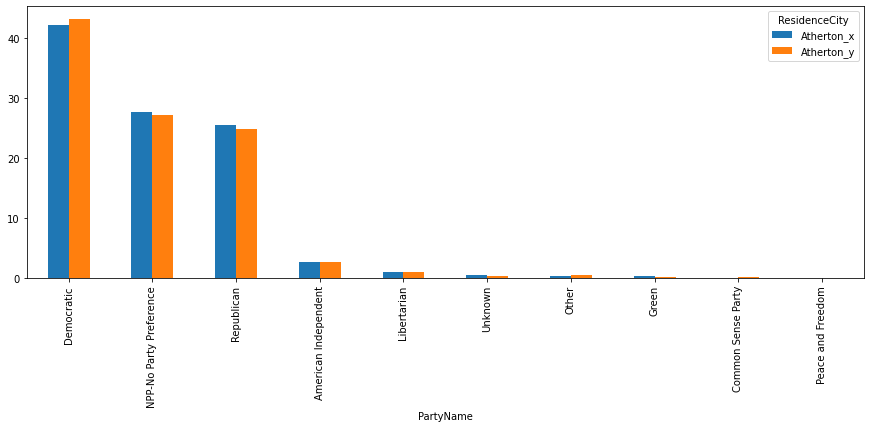

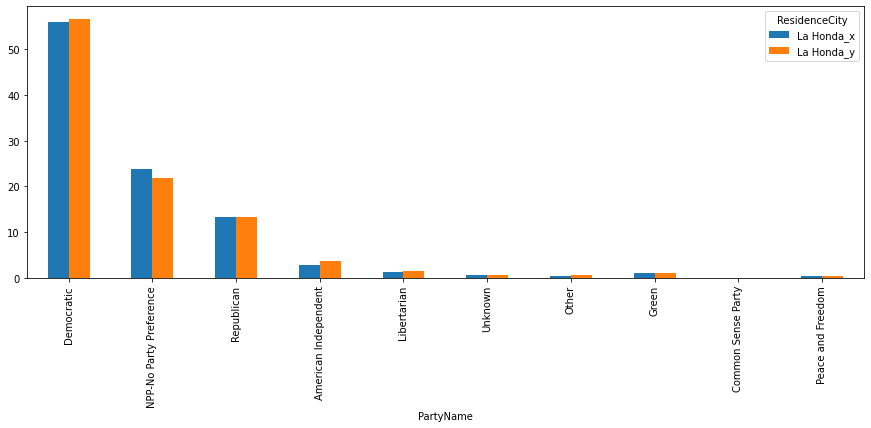

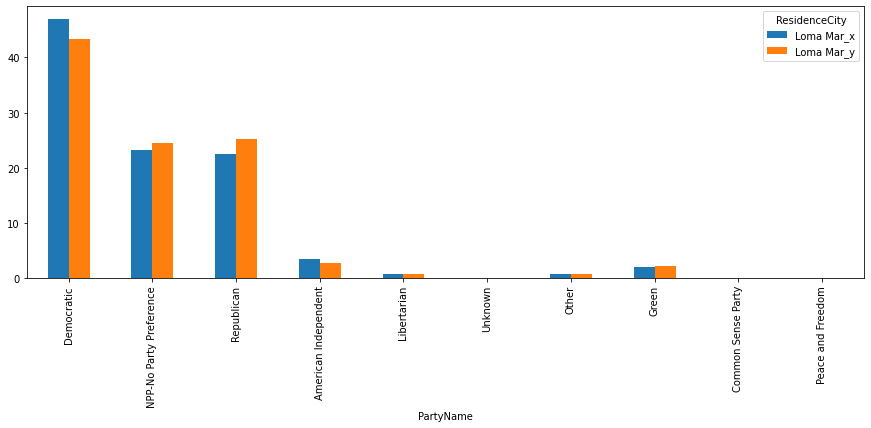

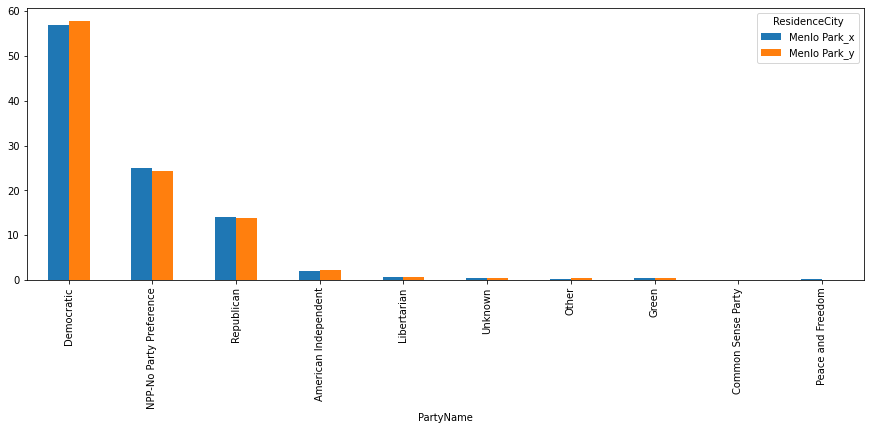

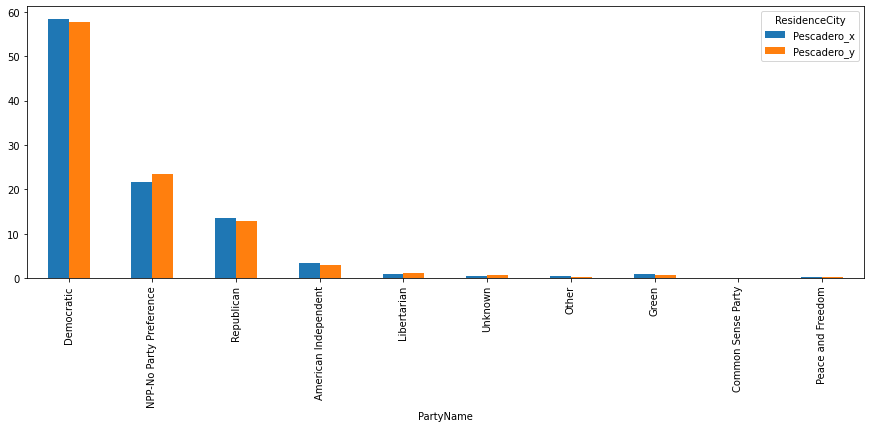

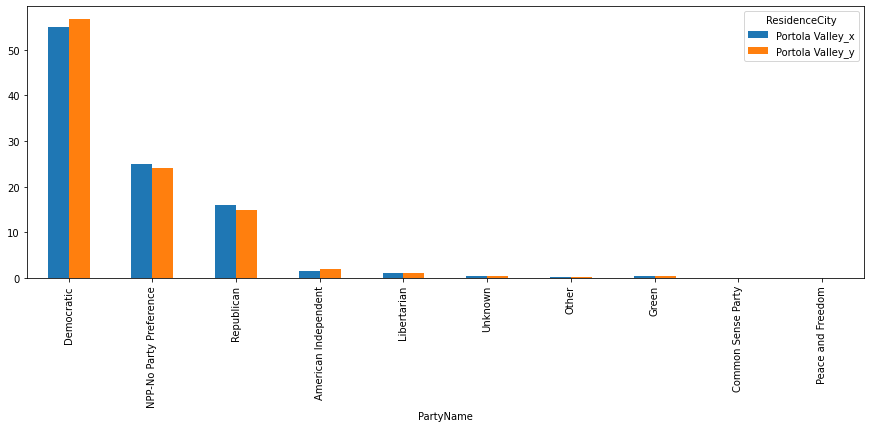

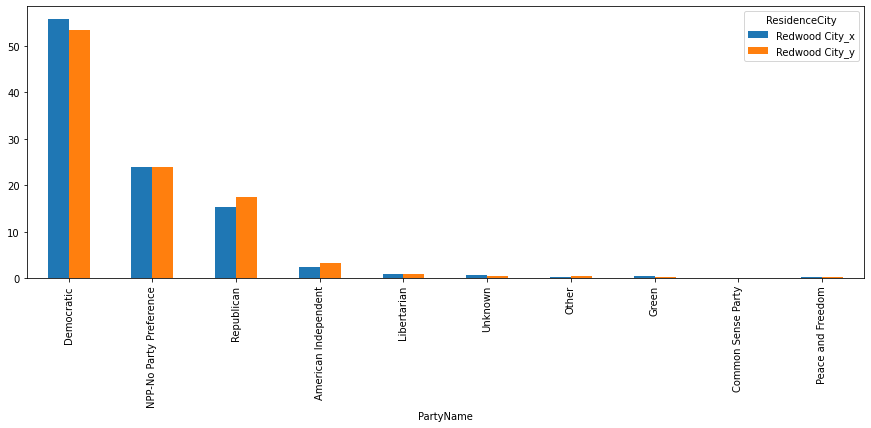

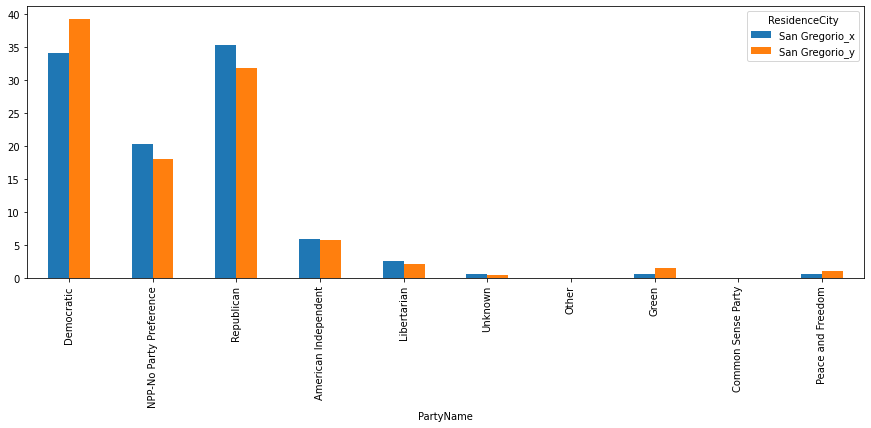

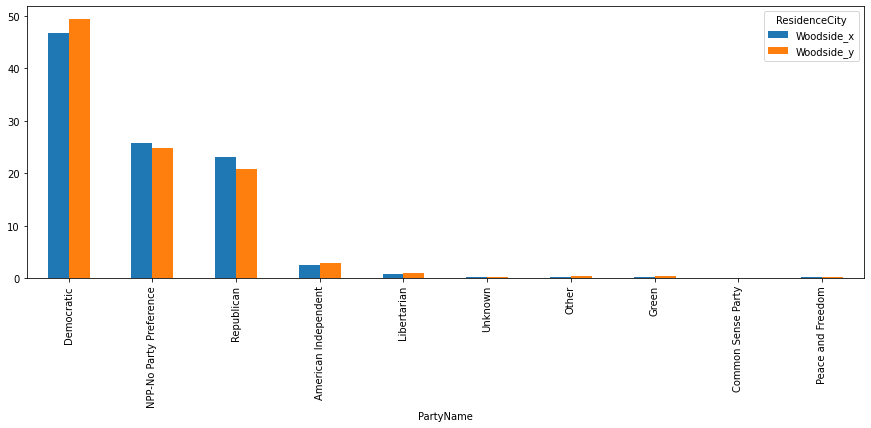

In [ ]:
# Percentage Party Comparison graph (old(x) vs. new(y)) on cities in common 
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["Atherton_x", "Atherton_y"], kind="bar",figsize=(15,5))
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["La Honda_x", "La Honda_y"], kind="bar",figsize=(15,5))
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["Loma Mar_x", "Loma Mar_y"], kind="bar",figsize=(15,5))
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["Menlo Park_x", "Menlo Park_y"], kind="bar",figsize=(15,5))
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["Pescadero_x", "Pescadero_y"], kind="bar",figsize=(15,5))
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["Portola Valley_x", "Portola Valley_y"], kind="bar",figsize=(15,5))
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["Redwood City_x", "Redwood City_y"], kind="bar",figsize=(15,5))
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["San Gregorio_x", "San Gregorio_y"], kind="bar",figsize=(15,5))
SM_city_party_merge_Data.iloc[:10].plot(x="PartyName", y=["Woodside_x", "Woodside_y"], kind="bar",figsize=(15,5))

In [ ]:
city_table = pd.DataFrame({'old':['Atherton_x', 'La Honda_x', 'Loma Mar_x', 'Menlo Park_x',
       'Pescadero_x', 'Portola Valley_x', 'Redwood City_x', 'San Carlos',
       'San Gregorio_x', 'Woodside_x']})
# print(city_table)
city_table2= pd.DataFrame ({'new':['Atherton_y', 'Burlingame',
       'El Granada', 'Half Moon Bay', 'La Honda_y', 'Loma Mar_y',
       'Menlo Park_y', 'Montara', 'Moss Beach', 'Pacifica', 'Pescadero_y',
       'Portola Valley_y', 'Princeton', 'Redwood City_y', 'San Gregorio_y',
       'Woodside_y']})
# print(city_table2)
a= pd.concat([city_table, city_table2], axis=1)
a


,old,new
0,Atherton_x,Atherton_y
1,La Honda_x,Burlingame
2,Loma Mar_x,El Granada
3,Menlo Park_x,Half Moon Bay
4,Pescadero_x,La Honda_y
5,Portola Valley_x,Loma Mar_y
6,Redwood City_x,Menlo Park_y
7,San Carlos,Montara
8,San Gregorio_x,Moss Beach
9,Woodside_x,Pacifica


###Comparsion plot on Ethinicty (new vs. old)

**County**

In [ ]:
#join two table 
SM_merge_Ethn_Data = pd.merge(SM_old_data_Ethnicity_count_table, SM_new_data_Ethnicity_count_table, how='outer',on = 'index')
SM_merge_Ethn_Data_fixed = SM_merge_Ethn_Data.rename(columns={'index':'Ethnicity','party count_x': 'SM_old_data_Ethnicity_count','Percentage_x':'%_SM_old_data_Ethnicity_count','party count_y': 'SM_new_data_Ethnicity_count','Percentage_y':'%_SM_new_data_Ethnicity_count'} )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
SM_merge_Ethn_Data_fixed

,Ethnicity,SM_old_data_Ethnicity_count,%_SM_old_data_Ethnicity_count,SM_new_data_Ethnicity_count,%_SM_new_data_Ethnicity_count
0,WHITE,17940,66.75,19346,68.94
1,HISP,3872,14.41,2747,9.79
2,ASIAN,3241,12.06,3914,13.95
3,MULT,1124,4.18,1362,4.85
4,OTHER,554,2.06,527,1.88
5,NATIV,81,0.30,120,0.43
6,BLACK,66,0.25,46,0.16


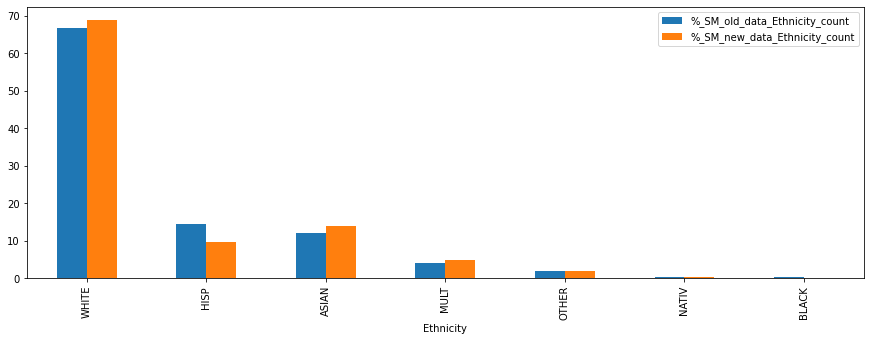

In [ ]:
SM_merge_Ethn_Data_fixed.plot(x="Ethnicity", y=["%_SM_old_data_Ethnicity_count", "%_SM_new_data_Ethnicity_count"], kind="bar",figsize=(15,5))

**City**

# Santa Clara

## Santa Clara_old_data

In [ ]:
os.chdir("/content/drive/Shareddrives/Modeling Files/CD16 List/Santa Clara Voter Data")

### data clean

In [ ]:
SC_old=pd.read_parquet('MVMJ004_Hist_20220216_091049_16thCongDist.parquet')
print(SC_old.shape)
SC_old.head()

(5565623, 11)


,lVoterUniqueID,sElectionAbbr,szElectionDesc,dtElectionDate,sElecTypeDesc,sVotingPrecinct,szVotingMethod,sPartyAbbr,szPartyName,szCountedFlag,szEVSiteDesc
0,2504277,2018Nov6,General Election,11/06/2018,General,2081,VBM Issued but not Returned,None,None,NaN,None
1,3222443,2018Nov6,General Election,11/06/2018,General,4271,VBM Issued but not Returned,None,None,NaN,None
2,2504495,2018Nov6,General Election,11/06/2018,General,2406,VBM Issued but not Returned,None,None,NaN,None
3,2504596,2018Nov6,General Election,11/06/2018,General,2410,VBM Issued but not Returned,None,None,NaN,None
4,2504696,2018Nov6,General Election,11/06/2018,General,1646,VBM Issued but not Returned,None,None,NaN,None


In [ ]:
#2020Mar3 Presidential Primary Election
#SC_old.dtElectionDate.unique()
SC_old_2020Mar3 = SC_old.loc[SC_old['dtElectionDate']=='03/03/2020']
print(SC_old_2020Mar3.shape)
SC_old_2020Mar3.head()

SC_old_data_2020Mar3 = pd.DataFrame(SC_old_2020Mar3)
print(SC_old_data_2020Mar3.shape)
SC_old_data_2020Mar3.head()

#'PRIMARY ELECTION'|'PRESIDENTIAL PRIMARY ELECTION'|'General Election'|'09/14/2021', '11/03/2020', **'03/03/2020'**, '05/04/2021','11/02/2021'

(295034, 11)
(295034, 11)


,lVoterUniqueID,sElectionAbbr,szElectionDesc,dtElectionDate,sElecTypeDesc,sVotingPrecinct,szVotingMethod,sPartyAbbr,szPartyName,szCountedFlag,szEVSiteDesc
1918,2162,2020Mar3,Presidential Primary Election,03/03/2020,Primary,2274,Mail Ballot Issued but not Returned,NP,Nonpartisan,NaN,None
1919,2821,2020Mar3,Presidential Primary Election,03/03/2020,Primary,8122,Mail Ballot Issued but not Returned,DEM,Democratic,NaN,None
1920,2822,2020Mar3,Presidential Primary Election,03/03/2020,Primary,8122,Mail Ballot Issued but not Returned,DEM,Democratic,NaN,None
1921,2839,2020Mar3,Presidential Primary Election,03/03/2020,Primary,8097,Mail Ballot Issued but not Returned,DEM,Democratic,NaN,None
1922,2846,2020Mar3,Presidential Primary Election,03/03/2020,Primary,3609,Mail Ballot Issued but not Returned,NP,Nonpartisan,NaN,None


In [ ]:
# print(SC_old_data_2020Mar3.szPartyName.unique())
# print(SC_old_data_2020Mar3.sElectionAbbr.unique())
# print(SC_old_data_2020Mar3.szElectionDesc.unique())
print(SC_old_data_2020Mar3.szEVSiteDesc.unique())

### Party Analysis

In [ ]:
SC_data_2020Mar3_Party_count = SC_old_data_2020Mar3['szPartyName'].value_counts()
Percent_SC_data_2020Mar3_Party_count = SC_old_data_2020Mar3['szPartyName'].value_counts(normalize = True).mul(100).round(2).astype(str)+"%"
SC_data_2020Mar3_party_table = pd.DataFrame({'party count':SC_data_2020Mar3_Party_count, 'Percentage':Percent_SC_data_2020Mar3_Party_count})
SC_data_2020Mar3_party_table.reset_index(level=0, inplace=True)
print(SC_data_2020Mar3_party_table.shape, SC_data_2020Mar3_party_table)
# SC_old_data_Party_count_bar_chart = SC_old_data_Party_count.plot(kind='bar')
# SC_old_data_Party_count_bar_chart.set_title("Party Distribution")


(20, 3)                              index  party count Percentage
0                       Democratic       166203     56.33%
1                       Republican        50398     17.08%
2                      Nonpartisan        47438     16.08%
3              No Party Preference        19989      6.78%
4             American Independent         6733      2.28%
5                      Libertarian         2299      0.78%
6                            Green          981      0.33%
7                Peace and Freedom          843      0.29%
8                      Independent           87      0.03%
9               Common Sense Party           37      0.01%
10                         Unknown            6       0.0%
11                           Other            6       0.0%
12                      Free Party            3       0.0%
13       California National Party            3       0.0%
14              Constitution Party            2       0.0%
15    Independent California Party            2 

## Santa Clara_new_data

In [ ]:
os.chdir("/content/drive/Shareddrives/Modeling Files/CD16 List/Santa Clara Voter Data")

### data_clean

In [ ]:
SC_new=pd.read_parquet('MVMJ004_Cust_20220216_090728_16thCongDist.parquet')
print(SC_new.shape)
SC_new.head()

(353786, 62)


,lVoterUniqueID,sAffNumber,szStateVoterID,sVoterTitle,szNameLast,szNameFirst,szNameMiddle,sNameSuffix,sGender,szSitusAddress,szSitusCity,sSitusState,sSitusZip,sHouseNum,sUnitAbbr,sUnitNum,szStreetName,sStreetSuffix,sPreDir,sPostDir,szMailAddress1,szMailAddress2,szMailAddress3,szMailAddress4,szMailZip,szPhone,szEmailAddress,dtBirthDate,sBirthPlace,dtRegDate,dtOrigRegDate,dtLastUpdate_dt,sStatusCode,szStatusReasonDesc,sUserCode1,sUserCode2,iDuplicateIDFlag,szLanguageName,szPartyName,szAVStatusAbbr,szAVStatusDesc,szPrecinctName,sPrecinctID,sPrecinctPortion,sDistrictID_0,iSubDistrict_0,szDistrictName_0,sDistrictID_1,iSubDistrict_1,szDistrictName_1,sDistrictID_2,iSubDistrict_2,szDistrictName_2,sDistrictID_3,iSubDistrict_3,szDistrictName_3,sDistrictID_4,iSubDistrict_4,szDistrictName_4,sDistrictID_5,iSubDistrict_5,szDistrictName_5
0,70633,65BU165715,NaN,None,Jones,Loretta,Lynn,None,None,1489 Carrington Cir,San Jose,CA,95125,1489,None,None,Carrington,Cir,None,None,1489 Carrington Cir,San Jose CA 95125,None,None,95125,(925)487-4281,lljones1184@yahoo.com,12/12/1959,NV,12/24/2018,05/26/1988,01/22/2019,A,CA StatewideOnline Reg - Update,None,None,0.0,NonRespond,Democratic,Perm VBM,Permanent Vote by Mail Voter,PCT 8622,8622,NaN,*0,0,County of Santa Clara,CG016,0,16th Congressional District,SS015,0,15th Senatorial District,SA028,0,28th Assembly District,*404,0,4th Supervisorial District,*520,9.0,San Jose-Council District 9
1,1009844,65CB365500,NaN,None,Nielsen,Karyn,Lyn,None,None,1493 Carrington Cir,San Jose,CA,95125,1493,None,None,Carrington,Cir,None,None,1493 Carrington Cir,San Jose CA 95125,None,None,95125,(408)264-5253,None,07/03/1969,CA,04/14/2020,07/15/1993,04/16/2020,A,CA StatewideOnline Reg - Update,None,None,0.0,English,Democratic,Perm VBM,Permanent Vote by Mail Voter,PCT 8622,8622,NaN,*0,0,County of Santa Clara,CG016,0,16th Congressional District,SS015,0,15th Senatorial District,SA028,0,28th Assembly District,*404,0,4th Supervisorial District,*520,9.0,San Jose-Council District 9
2,2569637,43TA660731,NaN,Miss,Bazzazi,Marjan,None,None,None,1457 Carrington Cir,San Jose,CA,95125,1457,None,None,Carrington,Cir,None,None,1457 Carrington Cir,San Jose CA 95125,None,None,95125,(801)815-5249,marjanbaz@gmail.com,12/19/1982,IR,03/21/2019,01/12/2016,03/26/2019,A,Reregistration no changes,None,None,0.0,English,No Party Preference,Perm VBM,Permanent Vote by Mail Voter,PCT 8622,8622,NaN,*0,0,County of Santa Clara,CG016,0,16th Congressional District,SS015,0,15th Senatorial District,SA028,0,28th Assembly District,*404,0,4th Supervisorial District,*520,9.0,San Jose-Council District 9
3,2900985,65CL640796,NaN,None,Ahmadi,Mahmoud,Reza,None,None,1457 Carrington Cir,San Jose,CA,95125,1457,None,None,Carrington,Cir,None,None,1457 Carrington Cir,San Jose CA 95125,None,None,95125,(617)466-9412,mrahmadi@umn.edu,03/24/1978,IR,09/11/2021,03/21/2019,09/14/2021,A,CA StatewideOnline Reg - Update,None,None,0.0,English,American Independent,None,None,PCT 8622,8622,NaN,*0,0,County of Santa Clara,CG016,0,16th Congressional District,SS015,0,15th Senatorial District,SA028,0,28th Assembly District,*404,0,4th Supervisorial District,*520,9.0,San Jose-Council District 9
4,2185012,65BU971459,NaN,None,Murison,Ashley,Janette,None,None,1473 Carrington Cir,San Jose,CA,95125,1473,None,None,Carrington,Cir,None,None,1473 Carrington Cir,San Jose CA 95125,None,None,95125,(408)505-0046,ashley.j.murison@gmail.com,01/11/1988,CA,07/01/2019,05/02/2008,08/27/2019,A,Third Party Change Of Address (In-County),None,None,0.0,English,Democratic,Perm VBM,Permanent Vote by Mail Voter,PCT 8622,8622,NaN,*0,0,County of Santa Clara,CG016,0,16th Congressional District,SS015,0,15th Senatorial District,SA028,0,28th Assembly District,*404,0,4th Supervisorial District,*520,9.0,San Jose-Council District 9


In [ ]:
SC_new.szSitusCity.unique()

array(['San Jose', 'Los Gatos', 'Saratoga', 'Campbell', 'Mountain View',
       'Monte Sereno', 'Los Altos', 'Palo Alto', 'Los Altos Hills',
       'Stanford', 'Redwood Estates', 'Portola Valley', 'Cupertino',
       'Moffett Field', 'Sunnyvale'], dtype=object)

In [ ]:
cols_Santa_Clara_new =['lVoterUniqueID','sStatusCode','szPartyName', 'szSitusCity','sGender',
                      'szPrecinctName','sPrecinctID','sPrecinctPortion','szDistrictName_1','szDistrictName_0']                    
SC_new_data_extract = pd.DataFrame(SC_new, columns=cols_Santa_Clara_new)
print(SC_new_data_extract.shape)
SC_new_data_extract.head()

(353786, 10)


,lVoterUniqueID,sStatusCode,szPartyName,szSitusCity,sGender,szPrecinctName,sPrecinctID,sPrecinctPortion,szDistrictName_1,szDistrictName_0
0,70633,A,Democratic,San Jose,None,PCT 8622,8622,NaN,16th Congressional District,County of Santa Clara
1,1009844,A,Democratic,San Jose,None,PCT 8622,8622,NaN,16th Congressional District,County of Santa Clara
2,2569637,A,No Party Preference,San Jose,None,PCT 8622,8622,NaN,16th Congressional District,County of Santa Clara
3,2900985,A,American Independent,San Jose,None,PCT 8622,8622,NaN,16th Congressional District,County of Santa Clara
4,2185012,A,Democratic,San Jose,None,PCT 8622,8622,NaN,16th Congressional District,County of Santa Clara


### Party Analysis

**Party Distribution (County)**

In [ ]:
# Party Distribution in 18th Congressional District
Santa_Clara_new_data_party_count = SC_new_data_extract['szPartyName'].value_counts()
Percent_Santa_Clara_new_data_party_count = SC_new_data_extract['szPartyName'].value_counts(normalize = True).mul(100).round(2).astype(str)+"%"
#SC_new_data_party_table = pd.DataFrame({'party name':SC_new_party_name ,'party count':Santa_Clara_new_data_party_count, 'Percentage':Percent_Santa_Clara_new_data_party_count})
SC_new_data_party_table = pd.DataFrame({'party count':Santa_Clara_new_data_party_count, 'Percentage':Percent_Santa_Clara_new_data_party_count})
SC_new_data_party_table.reset_index(level=0, inplace=True)
SC_new_data_party_table.head()


,index,party count,Percentage
0,Democratic,182629,51.62%
1,No Party Preference,97877,27.67%
2,Republican,58567,16.55%
3,American Independent,8286,2.34%
4,Libertarian,2921,0.83%


**city party count (number)**

In [ ]:
# party count (number)
SC_city_party_count = SC_new_data_extract.groupby(SC_new_data_extract.szSitusCity)['szPartyName'].value_counts()
SC_city_party_count = SC_city_party_count.unstack(level=0,fill_value=0)
SC_city_party_count['totals'] = SC_city_party_count.sum(axis=1)
SC_city_party_count_table1 = SC_city_party_count.sort_values(by='totals',ascending = False)
SC_city_party_count_table1
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

**city party count in percentage (%)**

In [ ]:
SC_city_percent_party_count = SC_new_data_extract.groupby(SC_new_data_extract.szSitusCity)['szPartyName'].value_counts(normalize=True).mul(100).round(2)
SC_city_percent_party_count=SC_city_percent_party_count.unstack(level=0,fill_value=0)
# SC_city_percent_party_count
SC_city_percent_party_count_table2 = SC_city_percent_party_count.sort_values(by='Campbell',ascending = False)
SC_city_percent_party_count_table2.reset_index(level=0, inplace=True)
SC_city_percent_party_count_table2.head(10)

szSitusCity,szPartyName,Campbell,Cupertino,Los Altos,Los Altos Hills,Los Gatos,Moffett Field,Monte Sereno,Mountain View,Palo Alto,Portola Valley,Redwood Estates,San Jose,Saratoga,Stanford,Sunnyvale
0,Democratic,50.72,37.36,50.97,45.03,48.33,50.0,43.03,56.92,58.05,51.22,42.31,50.60,43.84,70.30,40.0
1,No Party Preference,26.46,32.45,28.98,31.21,25.44,50.0,25.80,28.71,29.40,26.83,23.08,26.41,33.64,23.97,20.0
2,Republican,17.60,24.91,17.00,20.43,21.04,0.0,26.09,10.82,9.89,17.89,19.23,18.22,19.63,3.98,40.0
3,American Independent,3.08,2.64,1.78,1.90,3.19,0.0,3.31,1.82,1.30,0.81,7.69,2.69,1.72,0.83,0.0
4,Libertarian,1.05,1.51,0.70,0.72,1.20,0.0,0.99,0.77,0.59,2.44,0.00,0.86,0.59,0.19,0.0
5,Green,0.41,0.75,0.21,0.41,0.33,0.0,0.26,0.47,0.37,0.81,7.69,0.40,0.22,0.32,0.0
6,Peace and Freedom,0.35,0.38,0.09,0.08,0.18,0.0,0.18,0.25,0.14,0.00,0.00,0.51,0.14,0.08,0.0
7,Independent,0.12,0.00,0.14,0.13,0.15,0.0,0.18,0.08,0.14,0.00,0.00,0.09,0.12,0.16,0.0
8,Other,0.11,0.00,0.06,0.06,0.05,0.0,0.11,0.08,0.06,0.00,0.00,0.07,0.04,0.11,0.0
9,Common Sense Party,0.05,0.00,0.03,0.02,0.06,0.0,0.04,0.04,0.04,0.00,0.00,0.11,0.02,0.03,0.0


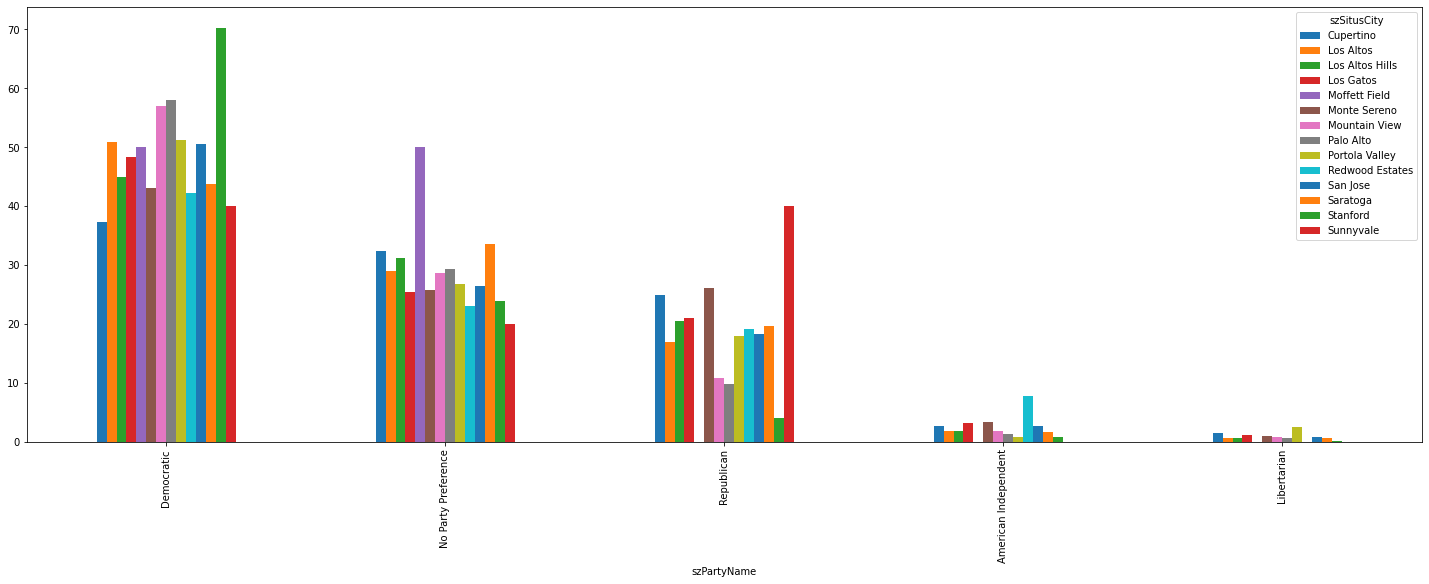

In [ ]:
SC_city_percent_party_count_table2[:5].plot(x=SC_city_percent_party_count_table2.columns[0], y=SC_city_percent_party_count_table2.columns[2:16], kind="bar",figsize=(25,8))

## Comparsion plot on Party (new vs. old)

old data: 295034 [2020Mar3 Presidential Primary Election]

---


new data: 353786

In [ ]:
#join two table 
df_merge_Data = pd.merge(SC_data_2020Mar3_party_table, SC_new_data_party_table, how='outer',on = 'index')
df_merge_Data_fixed = df_merge_Data.rename(columns={'index':'Party name','party count_x': 'SC_2020Mar3_data_party_count','Percentage_x':'%_SC_2020Mar3_data_party','party count_y': 'SC_new_data_party_count','Percentage_y':'%_SC_new_data_party'} )
df_merge_Data_fixed.fillna(0,inplace=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_merge_Data_fixed.head(10)

,Party name,SC_2020Mar3_data_party_count,%_SC_2020Mar3_data_party,SC_new_data_party_count,%_SC_new_data_party
0,Democratic,166203.0,56.33%,182629.0,51.62%
1,Republican,50398.0,17.08%,58567.0,16.55%
2,Nonpartisan,47438.0,16.08%,0.0,0
3,No Party Preference,19989.0,6.78%,97877.0,27.67%
4,American Independent,6733.0,2.28%,8286.0,2.34%
5,Libertarian,2299.0,0.78%,2921.0,0.83%
6,Green,981.0,0.33%,1314.0,0.37%
7,Peace and Freedom,843.0,0.29%,1170.0,0.33%
8,Independent,87.0,0.03%,383.0,0.11%
9,Common Sense Party,37.0,0.01%,249.0,0.07%


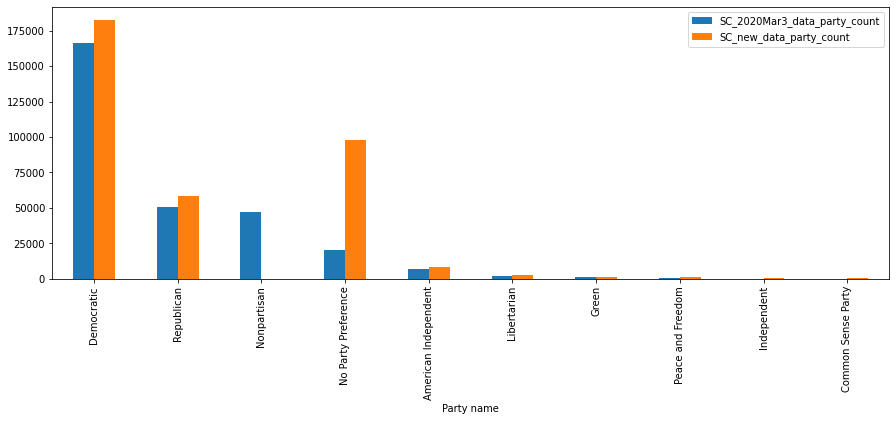

In [ ]:
df_merge_Data_fixed.iloc[:10].plot(x="Party name", y=["SC_2020Mar3_data_party_count", "SC_new_data_party_count"], kind="bar",figsize=(15,5))

# Santa Clara + San Mateo county Analysis

In [ ]:
SM_party_count_merge_table = pd.DataFrame(df_merge_Data_SM_fixed, columns = ['Party name','SM_old_data_party_count','SM_new_data_party_count'])
SM_party_count_merge_table.head()

,Party name,SM_old_data_party_count,SM_new_data_party_count
0,Democratic,41286.0,45947.0
1,NPP-No Party Preference,18686.0,19099.0
2,Republican,12234.0,12631.0
3,American Independent,1695.0,2259.0
4,Libertarian,622.0,748.0


In [ ]:
SC_party_count_merge_table = pd.DataFrame(df_merge_Data_fixed, columns = ['Party name','SC_2020Mar3_data_party_count','SC_new_data_party_count'])
SC_party_count_merge_table.head()

,Party name,SC_2020Mar3_data_party_count,SC_new_data_party_count
0,Democratic,166203.0,182629.0
1,Republican,50398.0,58567.0
2,Nonpartisan,47438.0,0.0
3,No Party Preference,19989.0,97877.0
4,American Independent,6733.0,8286.0


In [ ]:
joint_county_table = pd.merge (SM_party_count_merge_table, SC_party_count_merge_table, how='outer')
joint_county_table.fillna(0,inplace=True)
old_data_list = ['SM_old_data_party_count','SC_2020Mar3_data_party_count']
joint_county_table['old_data_totals'] = joint_county_table[old_data_list].sum(axis=1)
new_data_list = ['SM_new_data_party_count','SC_new_data_party_count']
joint_county_table['new_data_totals'] = joint_county_table[new_data_list].sum(axis=1)
joint_county_table['totals'] = joint_county_table.sum(axis=1)
joint_county_table.sort_values(by='totals',ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,Party name,SM_old_data_party_count,SM_new_data_party_count,SC_2020Mar3_data_party_count,SC_new_data_party_count,old_data_totals,new_data_totals,totals
0,Democratic,41286.0,45947.0,166203.0,182629.0,207489.0,228576.0,872130.0
2,Republican,12234.0,12631.0,50398.0,58567.0,62632.0,71198.0,267660.0
30,No Party Preference,0.0,0.0,19989.0,97877.0,19989.0,97877.0,235732.0
29,Nonpartisan,0.0,0.0,47438.0,0.0,47438.0,0.0,94876.0
1,NPP-No Party Preference,18686.0,19099.0,0.0,0.0,18686.0,19099.0,75570.0
3,American Independent,1695.0,2259.0,6733.0,8286.0,8428.0,10545.0,37946.0
4,Libertarian,622.0,748.0,2299.0,2921.0,2921.0,3669.0,13180.0
6,Green,315.0,414.0,981.0,1314.0,1296.0,1728.0,6048.0
8,Peace and Freedom,168.0,185.0,843.0,1170.0,1011.0,1355.0,4732.0
7,Other,230.0,386.0,6.0,253.0,236.0,639.0,1750.0


In [ ]:
joint_county_table1 = ["Party name","old_data_totals","new_data_totals","totals"]
joint_county_table1 = pd.DataFrame(joint_county_table, columns = joint_county_table1)
joint_county_table2 = joint_county_table1.sort_values(by='totals',ascending = False)
joint_county_table2['%_old']= joint_county_table2['old_data_totals']/joint_county_table2['old_data_totals'].sum().round(2)*100
joint_county_table2['%_new']= joint_county_table2['new_data_totals']/joint_county_table2['new_data_totals'].sum().round(2)*100
joint_county_table2.head(10)

,Party name,old_data_totals,new_data_totals,totals,%_old,%_new
0,Democratic,207489.0,228576.0,872130.0,55.964817,52.432423
2,Republican,62632.0,71198.0,267660.0,16.893370,16.331914
30,No Party Preference,19989.0,97877.0,235732.0,5.391518,22.451737
29,Nonpartisan,47438.0,0.0,94876.0,12.795179,0.000000
1,NPP-No Party Preference,18686.0,19099.0,75570.0,5.040068,4.381067
3,American Independent,8428.0,10545.0,37946.0,2.273236,2.418889
4,Libertarian,2921.0,3669.0,13180.0,0.787865,0.841622
6,Green,1296.0,1728.0,6048.0,0.349563,0.396381
8,Peace and Freedom,1011.0,1355.0,4732.0,0.272691,0.310820
7,Other,236.0,639.0,1750.0,0.063655,0.146578


In [ ]:
22.451737 + 4.381067 ,  5.391518 + 12.795179 +5.040068

# print(new,old)

(26.832804000000003, 23.226765)

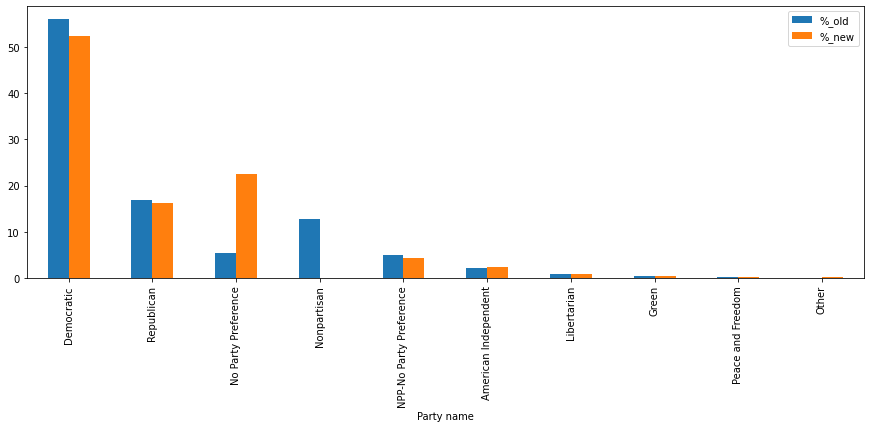

In [ ]:
joint_county_table2.iloc[:10].plot(x="Party name", y=["%_old", "%_new"], kind="bar",figsize=(15,5))


# Santa Cruz (old_data)

##Santa Cruz_raw data_clean


In [ ]:
os.chdir("/content/drive/MyDrive/Primary Electedbility analysis 2021-2022/3 county data")

In [ ]:
#read table 
data_santa_cruz = pd.read_csv("santa cruz.xlsx - full1721.csv")
print(data_santa_cruz.shape)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
data_santa_cruz.head()

(37651, 107)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,lVoterUniqueID,sAffNumber,szStateVoterID,sVoterTitle,szNameLast,szNameFirst,szNameMiddle,sNameSuffix,sGender,szSitusAddress,szSitusCity,sSitusState,sSitusZip,sHouseNum,sUnitAbbr,sUnitNum,szStreetName,sStreetSuffix,sPreDir,sPostDir,szMailAddress1,szMailAddress2,szMailAddress3,szMailAddress4,szMailZip,szPhone,szEmailAddress,dtBirthDate,sBirthPlace,dtRegDate,dtOrigRegDate,dtLastUpdate_dt,sStatusCode,szStatusReasonDesc,sUserCode1,sUserCode2,iDuplicateIDFlag,szLanguageName,szPartyName,szAVStatusAbbr,szAVStatusDesc,szPrecinctName,sPrecinctID,sPrecinctPortion,sDistrictID_0,iSubDistrict_0,szDistrictName_0,sDistrictID_1,iSubDistrict_1,szDistrictName_1,sDistrictID_2,iSubDistrict_2,szDistrictName_2,sDistrictID_3,iSubDistrict_3,szDistrictName_3,sDistrictID_4,iSubDistrict_4,szDistrictName_4,sDistrictID_5,iSubDistrict_5,szDistrictName_5,sElectionAbbr1,szElectionDesc1,dtElectionDate1,sElecTypeDesc1,sVotingPrecinct1,szVotingMethod1,sPartyAbbr1,szPartyName1,szCountedFlag1,sElectionAbbr2,szElectionDesc2,dtElectionDate2,sElecTypeDesc2,sVotingPrecinct2,szVotingMethod2,sPartyAbbr2,szPartyName2,szCountedFlag2,sElectionAbbr3,szElectionDesc3,dtElectionDate3,sElecTypeDesc3,sVotingPrecinct3,szVotingMethod3,sPartyAbbr3,szPartyName3,szCountedFlag3,sElectionAbbr4,szElectionDesc4,dtElectionDate4,sElecTypeDesc4,sVotingPrecinct4,szVotingMethod4,sPartyAbbr4,szPartyName4,szCountedFlag4,sElectionAbbr5,szElectionDesc5,dtElectionDate5,sElecTypeDesc5,sVotingPrecinct5,szVotingMethod5,sPartyAbbr5,szPartyName5,szCountedFlag5
0,15,65CB450302,NaN,NaN,Hede,Lori,NaN,NaN,NaN,140 Annies Way,Brookdale,CA,95007,140.0,NaN,NaN,Annies,Way,NaN,NaN,PO Box 360,Brookdale CA 95007,NaN,NaN,95007,(831)338-3133,lorihede@gmail.com,5/9/1974,CA,4/26/2020,2/12/2001,4/29/2020,A,CA StatewideOnline Reg - Update,NaN,NaN,0.0,NaN,Democratic,NaN,NaN,Pct 50113,50113,NaN,*0,0,Santa Cruz County,*118,0,18th Congressional District,*217,0,17th Senatorial District,*329,0,29th Assembly District,*405,0,5th Supervisorial District,NaN,NaN,NaN,2020Nov,Presidential General,11/3/2020,General,50111.0,Voted by VBM Ballot,NaN,NaN,Yes,2020March,Presidential Primary,3/3/2020,Primary,50113.0,Voted by VBM Ballot,DEM,Democratic,Yes,2018Nov,2018 Statewide General Election,11/6/2018,General,50113.0,Voted at Polling Place,NaN,NaN,Yes,2018June,Statewide Primary Election,6/5/2018,Primary,50113.0,Voted at Polling Place,DEM,Democratic,Yes,2016Nov,Presidential General Election,11/8/2016,General,50111.0,Voted at Polling Place,NaN,NaN,Yes
1,72161,00ZB921896,NaN,Mr,Bartholomew,Robert,Kenneth,NaN,NaN,170 Apple Knoll Dr,Boulder Creek,CA,95006,170.0,NaN,NaN,Apple Knoll,Dr,NaN,NaN,170 Apple Knoll Dr,Boulder Creek CA 95006,NaN,NaN,NaN,(831)338-3085,NaN,12/11/1944,CA,9/22/2003,10/9/1978,10/15/2003,A,Original Registration,NaN,NaN,0.0,NaN,Democratic,NaN,NaN,Pct 50191,50191,NaN,*0,0,Santa Cruz County,*118,0,18th Congressional District,*217,0,17th Senatorial District,*329,0,29th Assembly District,*405,0,5th Supervisorial District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,94124,65BQ065679,NaN,NaN,Sanchezsutcliffe,Angela,Marie,NaN,NaN,180 Apple Knoll Dr,Boulder Creek,CA,95006,180.0,NaN,NaN,Apple Knoll,Dr,NaN,NaN,180 Apple Knoll Dr,Boulder Creek CA 95006,NaN,NaN,NaN,(831)338-2560,NaN,6/20/1975,CA,5/31/2018,10/11/1994,6/7/2018,A,CA StatewideOnline Reg - Update,NaN,NaN,0.0,NaN,Democratic,Perm VBM,Permanent Vote By Mail,Pct 50191,50191,NaN,*0,0,Santa Cruz County,*118,0,18th Congressional District,*217,0,17th Senatorial District,*329,0,29th Assembly District,*405,0,5th Supervisorial District,NaN,NaN,NaN,2020Nov,Presidential General,11/3/2020,General,50161.0,Voted by VBM Ballot,NaN,NaN,Yes,2020March,Presidential Primary,3/3/2020,Primary,50191.0,Voted by VBM Ballot,DEM,Democratic,Yes,2018Nov,2018 Statewide General Election,11/6/2018,General,50191.0,Voted at Polling Place,NaN,NaN,Yes,NaN,NaN,NaN,Na

In [ ]:
#check all column names
#list(data_santa_cruz.columns)
#len(list(data_santa_cruz.columns))

In [ ]:
# party/all precincts column / geographic info / last time they vote. / ethnicity
columns_Santa_cruz =['sSitusZip','szPartyName','szPrecinctName','sPrecinctID','sPrecinctPortion','sDistrictID_0','szDistrictName_1','szElectionDesc1','sVotingPrecinct1','szPartyName1','szElectionDesc2','sVotingPrecinct2','szPartyName2','szElectionDesc3','sVotingPrecinct3','szElectionDesc4','sVotingPrecinct4','szPartyName4','szElectionDesc5','sVotingPrecinct5',
'szPartyName5']
print(data_santa_cruz[columns_Santa_cruz].shape)
data_santa_cruz[columns_Santa_cruz].head()

(37651, 21)


,sSitusZip,szPartyName,szPrecinctName,sPrecinctID,sPrecinctPortion,sDistrictID_0,szDistrictName_1,szElectionDesc1,sVotingPrecinct1,szPartyName1,szElectionDesc2,sVotingPrecinct2,szPartyName2,szElectionDesc3,sVotingPrecinct3,szElectionDesc4,sVotingPrecinct4,szPartyName4,szElectionDesc5,sVotingPrecinct5,szPartyName5
0,95007,Democratic,Pct 50113,50113,NaN,*0,18th Congressional District,Presidential General,50111.0,NaN,Presidential Primary,50113.0,Democratic,2018 Statewide General Election,50113.0,Statewide Primary Election,50113.0,Democratic,Presidential General Election,50111.0,NaN
1,95006,Democratic,Pct 50191,50191,NaN,*0,18th Congressional District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95006,Democratic,Pct 50191,50191,NaN,*0,18th Congressional District,Presidential General,50161.0,NaN,Presidential Primary,50191.0,Democratic,2018 Statewide General Election,50191.0,NaN,NaN,NaN,Presidential General Election,50191.0,NaN
3,95006,No Party Preference,Pct 50191,50191,NaN,*0,18th Congressional District,Presidential General,50161.0,NaN,Presidential Primary,50191.0,Democratic,2018 Statewide General Election,50191.0,NaN,NaN,NaN,Presidential General Election,50191.0,NaN
4,95006,Republican,Pct 50191,50191,NaN,*0,18th Congressional District,Presidential General,50161.0,NaN,Presidential Primary,50191.0,Republican,2018 Statewide General Election,50191.0,Statewide Primary Election,50191.0,Republican,Presidential General Election,50191.0,NaN


In [ ]:
# export to csv 
df = pd.DataFrame(data_santa_cruz[columns_Santa_cruz])
df.head()
df.to_csv("data_santa_cruz.csv")

##Santa Cruz_Party Analysis

In [ ]:
#read table 
data_clean_santa_cruz = pd.read_csv("data_santa_cruz.csv")
print(data_clean_santa_cruz.shape)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
data_clean_santa_cruz.head()

(37651, 22)


,Unnamed: 0,sSitusZip,szPartyName,szPrecinctName,sPrecinctID,sPrecinctPortion,sDistrictID_0,szDistrictName_1,szElectionDesc1,sVotingPrecinct1,szPartyName1,szElectionDesc2,sVotingPrecinct2,szPartyName2,szElectionDesc3,sVotingPrecinct3,szElectionDesc4,sVotingPrecinct4,szPartyName4,szElectionDesc5,sVotingPrecinct5,szPartyName5
0,0,95007,Democratic,Pct 50113,50113,NaN,*0,18th Congressional District,Presidential General,50111.0,NaN,Presidential Primary,50113.0,Democratic,2018 Statewide General Election,50113.0,Statewide Primary Election,50113.0,Democratic,Presidential General Election,50111.0,NaN
1,1,95006,Democratic,Pct 50191,50191,NaN,*0,18th Congressional District,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,95006,Democratic,Pct 50191,50191,NaN,*0,18th Congressional District,Presidential General,50161.0,NaN,Presidential Primary,50191.0,Democratic,2018 Statewide General Election,50191.0,NaN,NaN,NaN,Presidential General Election,50191.0,NaN
3,3,95006,No Party Preference,Pct 50191,50191,NaN,*0,18th Congressional District,Presidential General,50161.0,NaN,Presidential Primary,50191.0,Democratic,2018 Statewide General Election,50191.0,NaN,NaN,NaN,Presidential General Election,50191.0,NaN
4,4,95006,Republican,Pct 50191,50191,NaN,*0,18th Congressional District,Presidential General,50161.0,NaN,Presidential Primary,50191.0,Republican,2018 Statewide General Election,50191.0,Statewide Primary Election,50191.0,Republican,Presidential General Election,50191.0,NaN


### Santa Cruz Party Analysis in 18th Congressional District

In [ ]:
#check how many category szPartyName has
data_clean_santa_cruz.szPartyName.unique()

array(['Democratic', 'No Party Preference', 'Republican',
       'American Independent', 'Peace and Freedom', 'Libertarian',
       'Green', 'Other', 'Reform Party of California', 'Unknown',
       'Common Sense Party', 'Constitution Party of California',
       'Natural Law', 'California National Party'], dtype=object)

In [ ]:
#check all rows are in 18th Congressional District
data_clean_santa_cruz.szDistrictName_1.unique()

array(['18th Congressional District'], dtype=object)

                                  party count Percentage
Democratic                              19982     53.07%
No Party Preference                      8452     22.45%
Republican                               6790     18.03%
American Independent                     1159      3.08%
Libertarian                               535      1.42%
Green                                     339       0.9%
Other                                     187       0.5%
Peace and Freedom                         122      0.32%
Unknown                                    48      0.13%
Reform Party of California                 24      0.06%
Natural Law                                 7      0.02%
Common Sense Party                          4      0.01%
Constitution Party of California            1       0.0%
California National Party                   1       0.0%


Text(0.5, 1.0, 'Party Distribution')

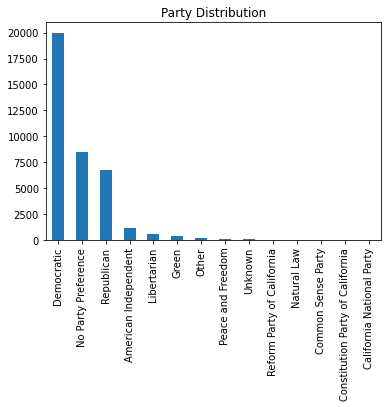

In [ ]:
# party_Distribution by szPartyName in 18th Congressional District
Santa_Cruz_Party_Distri_count = data_clean_santa_cruz['szPartyName'].value_counts()
Percent_Santa_Cruz_Party_Distri = data_clean_santa_cruz['szPartyName'].value_counts(normalize = True).mul(100).round(2).astype(str)+"%"
print(pd.DataFrame({'party count':Santa_Cruz_Party_Distri_count, 'Percentage':Percent_Santa_Cruz_Party_Distri}))
Santa_Cruz_bar_chart = Santa_Cruz_Party_Distri_count.plot(kind='bar')
Santa_Cruz_bar_chart.set_title("Party Distribution")

### Presidential General (No party value)

In [ ]:
#check how many category szElectionDesc1 has
data_clean_santa_cruz.szElectionDesc1.unique()
#check how many category szPartyName1 has
data_clean_santa_cruz.szPartyName1.unique()


array([nan])

### Presidential Primary Party Distribution Analysis



In [ ]:
# check category for Presidential Primary
data_clean_santa_cruz.szElectionDesc2.unique()
data_clean_santa_cruz.szPartyName2.unique()

array(['Democratic', nan, 'Republican', 'No Party Preference',
       'American Independent', 'Peace and Freedom',
       'Non-Partisan (System Use Only)', 'Libertarian', 'Green', 'Other',
       'Unknown', 'Common Sense Party', 'Reform Party of California',
       'Constitution Party of California', 'Natural Law',
       'Independent California Party'], dtype=object)

                                  party count Percentage
Democratic                              18759      62.6%
Republican                               5241     17.49%
Non-Partisan (System Use Only)           2506      8.36%
No Party Preference                      1785      5.96%
American Independent                      903      3.01%
Libertarian                               412      1.37%
Green                                     247      0.82%
Peace and Freedom                          66      0.22%
Other                                      23      0.08%
Unknown                                    11      0.04%
Reform Party of California                  8      0.03%
Common Sense Party                          1       0.0%
Constitution Party of California            1       0.0%
Natural Law                                 1       0.0%
Independent California Party                1       0.0%


Text(0.5, 1.0, 'Party Distribution')

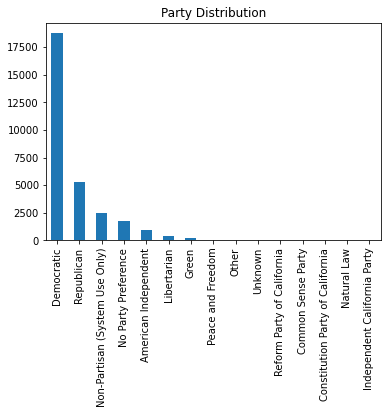

In [ ]:
# party_Distribution Presidential Primary in 18th Congressional District
SC_Presidential_Primary_Party_Distri_count = data_clean_santa_cruz['szPartyName2'].value_counts()
Percent_SC_Presidential_Primary_Party_Distri_count = data_clean_santa_cruz['szPartyName2'].value_counts(normalize = True).mul(100).round(2).astype(str)+"%"
print(pd.DataFrame({'party count':SC_Presidential_Primary_Party_Distri_count, 'Percentage':Percent_SC_Presidential_Primary_Party_Distri_count}))
SC_Presidential_Primary_bar_chart = SC_Presidential_Primary_Party_Distri_count.plot(kind='bar')
SC_Presidential_Primary_bar_chart.set_title("Party Distribution")

### 2018 Statewide General Election (No Party Value)

In [ ]:
#check category 2018 Statewide General Election
data_clean_santa_cruz.szElectionDesc3.unique()

data_santa_cruz.szPartyName3.unique()

array([nan])

### Statewide Primary Election Party Distribution Analysis

In [ ]:
#check category Statewide Primary Election
data_clean_santa_cruz.szElectionDesc4.unique()

data_clean_santa_cruz.szPartyName4.unique()

array(['Democratic', nan, 'Republican', 'Non-Partisan (System Use Only)',
       'AIP ', 'Libertarian', 'No Party Preference', 'NPP ', 'Green',
       'American Independent', 'DEM ', 'Other', 'REP ',
       'Reform Party of California', 'Peace and Freedom', 'LIB ',
       'Unknown', 'OTHR', 'GRN ', 'Natural Law',
       'California National Party', 'PAF '], dtype=object)

                                party count Percentage
Democratic                            11865     51.03%
Republican                             4458     19.17%
No Party Preference                    2837      12.2%
Non-Partisan (System Use Only)         2266      9.75%
American Independent                    600      2.58%
DEM                                     297      1.28%
Libertarian                             295      1.27%
Green                                   271      1.17%
NPP                                     127      0.55%
REP                                      71      0.31%
Peace and Freedom                        53      0.23%
Other                                    52      0.22%
Reform Party of California               20      0.09%
AIP                                       9      0.04%
LIB                                       7      0.03%
Unknown                                   6      0.03%
GRN                                       5      0.02%
Natural La

Text(0.5, 1.0, 'Party Distribution')

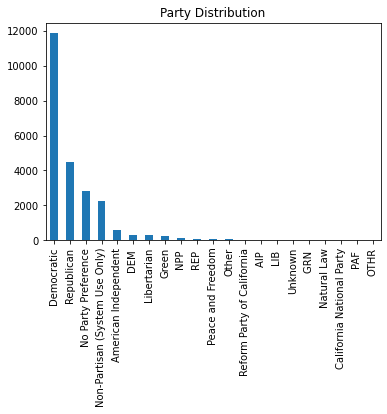

In [ ]:
# party_Distribution Statewide Primary in 18th Congressional District
SC_Statewide_Primary_Party_Distri_count = data_clean_santa_cruz['szPartyName4'].value_counts()
Percent_SC_Statewide_Primary_Party_Distri_count = data_clean_santa_cruz['szPartyName4'].value_counts(normalize = True).mul(100).round(2).astype(str)+"%"
print(pd.DataFrame({'party count':SC_Statewide_Primary_Party_Distri_count, 'Percentage':Percent_SC_Statewide_Primary_Party_Distri_count}))
SC_Statewide_Primary_bar_chart = SC_Statewide_Primary_Party_Distri_count.plot(kind='bar')
SC_Statewide_Primary_bar_chart.set_title("Party Distribution")

### Presidential General Election (No Party Value)

In [ ]:
#check category Presidential General Election
data_clean_santa_cruz.szElectionDesc5.unique()

data_clean_santa_cruz.szPartyName5.unique()

array([nan])

In [ ]:
# data['sAffNumber']=data['sAffNumber'].astype('str') 


In [ ]:
# data.to_parquet('santa clara.tx.parquet')